### Part 1 Preprocessing Steps

In [1]:
# Import Pandas (and StatsModels and Numpy)
import pandas as pd
import statsmodels.formula.api as sm
import numpy as np

In [2]:
# 1 Import Sale.csv
sales_data = pd.read_csv('C:/Users/bonne/Downloads/sale.csv', low_memory=False)

In [3]:
# 2 Filter the data to only include rows with:
## a sales transactions with document dates in 2012 or later 
sales_data

,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,...,PropertyType,PrincipalUse,SaleInstrument,AFForestLand,AFCurrentUseLand,AFNonProfitUse,AFHistoricProperty,SaleReason,PropertyClass,SaleWarning
0,2687551,138860,110,08/21/2014,245000,20140828001436,,,,,...,3,6,3,N,N,N,N,1,8,
1,1235111,664885,40,07/09/1991,0,199203161090,071,001,664885,C,...,3,0,26,N,N,N,N,18,3,11
2,2704079,423943,50,10/11/2014,0,20141205000558,,,,,...,3,6,15,N,N,N,N,18,8,18 31 51
3,2584094,403700,715,01/04/2013,0,20130110000910,,,,,...,3,6,15,N,N,N,N,11,8,18 31 38
4,1056831,951120,900,04/20/1989,85000,198904260448,117,053,951120,P,...,3,0,2,N,N,N,N,1,9,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2042167,1297101,118000,2105,01/15/1993,0,199303113226,005,058,118000,P,...,1,0,15,N,N,N,N,18,8,32
2042168,1524673,112305,9087,01/18/1997,0,199701230000,000,000,000000,,...,3,6,15,N,N,N,N,5,8,32 51
2042169,1736766,684070,510,11/21/1999,0,20000218000362,,,,,...,0,6,15,N,N,N,N,5,0,31 51
2042170,2542699,102503,9214,04/26/2012,1350000,20120509001258,,,,,...,3,6,3,N,N,N,N,1,8,


In [4]:
# Convert datatype of DocumentDate from Object to datetime64[ns]
sales_data.DocumentDate = pd.to_datetime(sales_data.DocumentDate, format = '%m/%d/%Y')
print(sales_data.dtypes)

ExciseTaxNbr                   int64
Major                         object
Minor                         object
DocumentDate          datetime64[ns]
SalePrice                      int64
RecordingNbr                  object
Volume                        object
Page                          object
PlatNbr                       object
PlatType                      object
PlatLot                       object
PlatBlock                     object
SellerName                    object
BuyerName                     object
PropertyType                   int64
PrincipalUse                   int64
SaleInstrument                 int64
AFForestLand                  object
AFCurrentUseLand              object
AFNonProfitUse                object
AFHistoricProperty            object
SaleReason                     int64
PropertyClass                  int64
SaleWarning                   object
dtype: object


In [5]:
# We took a copy of sales_data to keep our original data untouched
sales_data_copy = sales_data.copy()

In [6]:
# We filtered a copy of our new data looking specfically at Year
sales_data_copy = sales_data_copy.loc[sales_data_copy.DocumentDate.dt.year >= 2012]

In [7]:
sales_data_copy

,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,...,PropertyType,PrincipalUse,SaleInstrument,AFForestLand,AFCurrentUseLand,AFNonProfitUse,AFHistoricProperty,SaleReason,PropertyClass,SaleWarning
0,2687551,138860,110,2014-08-21,245000,20140828001436,,,,,...,3,6,3,N,N,N,N,1,8,
2,2704079,423943,50,2014-10-11,0,20141205000558,,,,,...,3,6,15,N,N,N,N,18,8,18 31 51
3,2584094,403700,715,2013-01-04,0,20130110000910,,,,,...,3,6,15,N,N,N,N,11,8,18 31 38
23,2671216,98400,380,2014-04-02,0,20140602000186,,,,,...,3,6,15,N,N,N,N,11,8,18 31 38
25,2548641,330395,1610,2012-06-07,335000,20120615000867,,,,,...,3,6,3,N,N,N,N,1,8,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2042154,2983964,327861,3130,2019-04-11,650000,20190424001027,,,,,...,11,6,3,N,N,N,N,1,8,
2042155,2592152,128230,420,2013-02-28,225000,20130304001784,,,,,...,3,11,3,N,N,N,N,1,2,10 55
2042158,2539921,762570,2815,2012-04-04,0,20120424000553,,,,,...,3,4,15,N,N,N,N,18,2,11 18 31
2042162,2972689,929085,760,2019-01-25,1205000,20190206001611,,,,,...,3,6,24,N,N,N,N,18,8,12


In [8]:
# b filtering the sales_data_copy dataset by salesprice greater than 100,000
sales_data_copy = sales_data_copy.loc[sales_data_copy.SalePrice > 100000]

In [9]:
sales_data_copy

,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,...,PropertyType,PrincipalUse,SaleInstrument,AFForestLand,AFCurrentUseLand,AFNonProfitUse,AFHistoricProperty,SaleReason,PropertyClass,SaleWarning
0,2687551,138860,110,2014-08-21,245000,20140828001436,,,,,...,3,6,3,N,N,N,N,1,8,
25,2548641,330395,1610,2012-06-07,335000,20120615000867,,,,,...,3,6,3,N,N,N,N,1,8,
29,2743355,638580,110,2015-07-14,190000,20150715002686,,,,,...,3,6,3,N,N,N,N,1,8,15
53,2559110,239571,100,2012-08-13,327500,20120815002264,,,,,...,3,6,3,N,N,N,N,1,8,
95,2999169,919715,200,2019-07-08,192000,20190712001080,,,,,...,3,2,3,N,N,N,N,1,3,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2042149,2671645,363460,120,2014-05-30,188000,20140604000887,,,,,...,3,2,3,N,N,N,N,1,3,
2042154,2983964,327861,3130,2019-04-11,650000,20190424001027,,,,,...,11,6,3,N,N,N,N,1,8,
2042155,2592152,128230,420,2013-02-28,225000,20130304001784,,,,,...,3,11,3,N,N,N,N,1,2,10 55
2042162,2972689,929085,760,2019-01-25,1205000,20190206001611,,,,,...,3,6,24,N,N,N,N,18,8,12


In [10]:
# c setting sales instrument = statutory warranty deed
sales_data_copy = sales_data_copy.loc[sales_data_copy.SaleInstrument == 3]

In [11]:
sales_data_copy

,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,...,PropertyType,PrincipalUse,SaleInstrument,AFForestLand,AFCurrentUseLand,AFNonProfitUse,AFHistoricProperty,SaleReason,PropertyClass,SaleWarning
0,2687551,138860,110,2014-08-21,245000,20140828001436,,,,,...,3,6,3,N,N,N,N,1,8,
25,2548641,330395,1610,2012-06-07,335000,20120615000867,,,,,...,3,6,3,N,N,N,N,1,8,
29,2743355,638580,110,2015-07-14,190000,20150715002686,,,,,...,3,6,3,N,N,N,N,1,8,15
53,2559110,239571,100,2012-08-13,327500,20120815002264,,,,,...,3,6,3,N,N,N,N,1,8,
95,2999169,919715,200,2019-07-08,192000,20190712001080,,,,,...,3,2,3,N,N,N,N,1,3,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2042128,2928909,278470,120,2018-04-30,440000,20180508000720,,,,,...,3,2,3,N,N,N,N,1,3,
2042149,2671645,363460,120,2014-05-30,188000,20140604000887,,,,,...,3,2,3,N,N,N,N,1,3,
2042154,2983964,327861,3130,2019-04-11,650000,20190424001027,,,,,...,11,6,3,N,N,N,N,1,8,
2042155,2592152,128230,420,2013-02-28,225000,20130304001784,,,,,...,3,11,3,N,N,N,N,1,2,10 55


In [12]:
# d Setting Property class = improved property
sales_data_copy = sales_data_copy.loc[sales_data_copy.PropertyClass == 8]

In [13]:
sales_data_copy

,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,...,PropertyType,PrincipalUse,SaleInstrument,AFForestLand,AFCurrentUseLand,AFNonProfitUse,AFHistoricProperty,SaleReason,PropertyClass,SaleWarning
0,2687551,138860,110,2014-08-21,245000,20140828001436,,,,,...,3,6,3,N,N,N,N,1,8,
25,2548641,330395,1610,2012-06-07,335000,20120615000867,,,,,...,3,6,3,N,N,N,N,1,8,
29,2743355,638580,110,2015-07-14,190000,20150715002686,,,,,...,3,6,3,N,N,N,N,1,8,15
53,2559110,239571,100,2012-08-13,327500,20120815002264,,,,,...,3,6,3,N,N,N,N,1,8,
184,2642952,720319,520,2013-11-20,699950,20131126001594,,,,,...,2,6,3,N,N,N,N,1,8,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2042086,2829964,170290,430,2016-10-10,270625,20161025000808,,,,,...,11,6,3,,,,,1,8,15
2042095,2688516,222406,9165,2014-09-02,801000,20140903000948,,,,,...,3,6,3,,,,,1,8,
2042099,2628283,955804,320,2013-08-28,425000,20130903001892,,,,,...,3,6,3,N,N,N,N,1,8,
2042154,2983964,327861,3130,2019-04-11,650000,20190424001027,,,,,...,11,6,3,N,N,N,N,1,8,


In [14]:
# e Setting propertytype = Household, single family units
sales_data_copy = sales_data_copy.loc[sales_data_copy.PropertyType == 11]

In [15]:
sales_data_copy

,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,...,PropertyType,PrincipalUse,SaleInstrument,AFForestLand,AFCurrentUseLand,AFNonProfitUse,AFHistoricProperty,SaleReason,PropertyClass,SaleWarning
403,2954083,507840,130,2018-09-13,3300000,20180925000616,,,,,...,11,6,3,N,N,N,N,1,8,
497,2864540,231000,480,2017-05-10,410000,20170515001333,,,,,...,11,6,3,,,,,1,8,
520,2859159,221250,90,2017-04-12,400000,20170418000436,,,,,...,11,6,3,,,,,1,8,
559,2993601,140281,20,2019-06-04,450000,20190614000489,,,,,...,11,6,3,N,N,N,N,1,8,
597,2854492,604640,205,2017-03-21,800000,20170322000714,,,,,...,11,6,3,,,,,1,8,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2042008,2858860,392540,85,2017-03-22,850000,20170414001087,,,,,...,11,6,3,,,,,1,8,15 51
2042012,2975556,38700,40,2019-02-25,638000,20190228000842,,,,,...,11,6,3,N,N,N,N,1,8,
2042022,2838173,92304,9365,2016-12-02,250000,20161207001708,,,,,...,11,6,3,,,,,1,8,15
2042086,2829964,170290,430,2016-10-10,270625,20161025000808,,,,,...,11,6,3,,,,,1,8,15


In [16]:
# f Setting principaluse = residential
sales_data_copy = sales_data_copy.loc[sales_data_copy.PrincipalUse == 6]

In [17]:
sales_data_copy

,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,...,PropertyType,PrincipalUse,SaleInstrument,AFForestLand,AFCurrentUseLand,AFNonProfitUse,AFHistoricProperty,SaleReason,PropertyClass,SaleWarning
403,2954083,507840,130,2018-09-13,3300000,20180925000616,,,,,...,11,6,3,N,N,N,N,1,8,
497,2864540,231000,480,2017-05-10,410000,20170515001333,,,,,...,11,6,3,,,,,1,8,
520,2859159,221250,90,2017-04-12,400000,20170418000436,,,,,...,11,6,3,,,,,1,8,
559,2993601,140281,20,2019-06-04,450000,20190614000489,,,,,...,11,6,3,N,N,N,N,1,8,
597,2854492,604640,205,2017-03-21,800000,20170322000714,,,,,...,11,6,3,,,,,1,8,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2042008,2858860,392540,85,2017-03-22,850000,20170414001087,,,,,...,11,6,3,,,,,1,8,15 51
2042012,2975556,38700,40,2019-02-25,638000,20190228000842,,,,,...,11,6,3,N,N,N,N,1,8,
2042022,2838173,92304,9365,2016-12-02,250000,20161207001708,,,,,...,11,6,3,,,,,1,8,15
2042086,2829964,170290,430,2016-10-10,270625,20161025000808,,,,,...,11,6,3,,,,,1,8,15


In [18]:
# g Setting salewarning = an empty space, ' '
sales_data_copy = sales_data_copy.loc[sales_data_copy.SaleWarning == ' ']

In [19]:
sales_data_copy

,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,...,PropertyType,PrincipalUse,SaleInstrument,AFForestLand,AFCurrentUseLand,AFNonProfitUse,AFHistoricProperty,SaleReason,PropertyClass,SaleWarning
403,2954083,507840,130,2018-09-13,3300000,20180925000616,,,,,...,11,6,3,N,N,N,N,1,8,
497,2864540,231000,480,2017-05-10,410000,20170515001333,,,,,...,11,6,3,,,,,1,8,
520,2859159,221250,90,2017-04-12,400000,20170418000436,,,,,...,11,6,3,,,,,1,8,
559,2993601,140281,20,2019-06-04,450000,20190614000489,,,,,...,11,6,3,N,N,N,N,1,8,
597,2854492,604640,205,2017-03-21,800000,20170322000714,,,,,...,11,6,3,,,,,1,8,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2041800,2876851,407320,466,2017-07-12,680000,20170713000952,,,,,...,11,6,3,,,,,1,8,
2041819,3007537,195442,10,2019-08-26,764000,20190829000480,,,,,...,11,6,3,N,N,N,N,1,8,
2041946,2998382,682110,95,2019-07-01,662000,20190709000964,,,,,...,11,6,3,N,N,N,N,1,8,
2042012,2975556,38700,40,2019-02-25,638000,20190228000842,,,,,...,11,6,3,N,N,N,N,1,8,


In [20]:
# 3 Keep only the following columns: Major, Minor, DocumentDate, and SalePrice
sales_data_copy = sales_data_copy[['Major', 'Minor', 'DocumentDate', 'SalePrice']]

In [21]:
sales_data_copy

,Major,Minor,DocumentDate,SalePrice
403,507840,130,2018-09-13,3300000
497,231000,480,2017-05-10,410000
520,221250,90,2017-04-12,400000
559,140281,20,2019-06-04,450000
597,604640,205,2017-03-21,800000
...,...,...,...,...
2041800,407320,466,2017-07-12,680000
2041819,195442,10,2019-08-26,764000
2041946,682110,95,2019-07-01,662000
2042012,38700,40,2019-02-25,638000


In [22]:
# 4 Create a new field, TransactionYear defined as the year of the DocumentDate
sales_data_copy['TransactionYear'] = sales_data_copy.DocumentDate.dt.year

<ipython-input-22-52b4b6a5e4ff>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data_copy['TransactionYear'] = sales_data_copy.DocumentDate.dt.year


In [23]:
sales_data_copy

,Major,Minor,DocumentDate,SalePrice,TransactionYear
403,507840,130,2018-09-13,3300000,2018
497,231000,480,2017-05-10,410000,2017
520,221250,90,2017-04-12,400000,2017
559,140281,20,2019-06-04,450000,2019
597,604640,205,2017-03-21,800000,2017
...,...,...,...,...,...
2041800,407320,466,2017-07-12,680000,2017
2041819,195442,10,2019-08-26,764000,2019
2041946,682110,95,2019-07-01,662000,2019
2042012,38700,40,2019-02-25,638000,2019


In [24]:
# a sorting the sales_data_copy dataframe by year and updating current dataframe
sales_data_copy.sort_values('TransactionYear', ascending = True, inplace = True)

<ipython-input-24-76fb41b9adec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data_copy.sort_values('TransactionYear', ascending = True, inplace = True)


In [25]:
sales_data_copy

,Major,Minor,DocumentDate,SalePrice,TransactionYear
79648,197370,190,2012-07-17,525000,2012
642056,701120,897,2012-10-22,520000,2012
1692203,152204,9036,2012-03-29,178950,2012
1467201,41800,365,2012-08-23,167500,2012
587819,327500,20,2012-02-13,353500,2012
...,...,...,...,...,...
1557997,866320,190,2019-05-01,760000,2019
712839,289110,540,2019-06-14,335000,2019
712641,81810,50,2019-04-10,499995,2019
715220,72304,9301,2019-05-29,485000,2019


In [26]:
# 5 Import ResidentialBuilding.csv
ResidentialBuilding_data = pd.read_csv('C:/Users/bonne/Downloads/ResidentialBuilding.csv', low_memory=False)

In [27]:
# We took a copy of ResidentialBuilding_data to keep our original data untouched
ResidentialBuilding_data_copy = ResidentialBuilding_data.copy()

In [28]:
ResidentialBuilding_data_copy

,Major,Minor,BldgNbr,NbrLivingUnits,Address,BuildingNumber,Fraction,DirectionPrefix,StreetName,StreetType,...,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,PcntComplete,Obsolescence,PcntNetCondition,Condition,AddnlCost
0,33920,90,1,1,18543 NE 102ND CT 98052,18543,,NE,102ND,CT,...,0,0,0,1996,0,0,0,0,3,0
1,33920,100,1,1,18535 NE 102ND CT 98052,18535,,NE,102ND,CT,...,0,0,0,1996,0,0,0,0,3,0
2,33920,140,1,1,18505 NE 102ND CT 98052,18505,,NE,102ND,CT,...,0,0,0,1996,0,0,0,0,3,0
3,33960,150,1,1,18119 NE 91ST CT 98052,18119,,NE,91ST,CT,...,1,0,0,1986,0,0,0,0,3,0
4,34200,490,1,1,611 33RD AVE 98122,611,,,33RD,AVE,...,1,0,0,1908,0,0,0,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513876,502945,1250,1,1,2714 SW 344TH PL 98023,2714,,SW,344TH,PL,...,1,0,1,1980,0,0,0,0,4,0
513877,502946,50,1,1,2803 SW 347TH ST 98023,2803,,SW,347TH,ST,...,0,0,0,1986,0,0,0,0,4,0
513878,502946,200,1,1,34815 28TH PL SW 98023,34815,,,28TH,PL,...,0,0,0,1983,0,0,0,0,3,0
513879,502946,340,1,1,2743 SW 347TH PL 98023,2743,,SW,347TH,PL,...,0,0,0,1983,0,0,0,0,4,0


In [29]:
# 6 Only keep rows with NbrLivingUnits = 1
ResidentialBuilding_data_copy = ResidentialBuilding_data_copy.loc[ResidentialBuilding_data_copy.NbrLivingUnits == 1]

In [30]:
ResidentialBuilding_data_copy

,Major,Minor,BldgNbr,NbrLivingUnits,Address,BuildingNumber,Fraction,DirectionPrefix,StreetName,StreetType,...,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,PcntComplete,Obsolescence,PcntNetCondition,Condition,AddnlCost
0,33920,90,1,1,18543 NE 102ND CT 98052,18543,,NE,102ND,CT,...,0,0,0,1996,0,0,0,0,3,0
1,33920,100,1,1,18535 NE 102ND CT 98052,18535,,NE,102ND,CT,...,0,0,0,1996,0,0,0,0,3,0
2,33920,140,1,1,18505 NE 102ND CT 98052,18505,,NE,102ND,CT,...,0,0,0,1996,0,0,0,0,3,0
3,33960,150,1,1,18119 NE 91ST CT 98052,18119,,NE,91ST,CT,...,1,0,0,1986,0,0,0,0,3,0
4,34200,490,1,1,611 33RD AVE 98122,611,,,33RD,AVE,...,1,0,0,1908,0,0,0,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513876,502945,1250,1,1,2714 SW 344TH PL 98023,2714,,SW,344TH,PL,...,1,0,1,1980,0,0,0,0,4,0
513877,502946,50,1,1,2803 SW 347TH ST 98023,2803,,SW,347TH,ST,...,0,0,0,1986,0,0,0,0,4,0
513878,502946,200,1,1,34815 28TH PL SW 98023,34815,,,28TH,PL,...,0,0,0,1983,0,0,0,0,3,0
513879,502946,340,1,1,2743 SW 347TH PL 98023,2743,,SW,347TH,PL,...,0,0,0,1983,0,0,0,0,4,0


In [31]:
# .eq(' ').sum() - counting all empty spaces in dataset
#ResidentialBuilding_data_copy.eq(' ').sum()

In [32]:
# Replace empty spaces in ZipCode and SqFtTotLiving with NaN (null values)
ResidentialBuilding_data_copy['ZipCode'].replace(' ', np.nan, inplace = True)
ResidentialBuilding_data_copy['SqFtTotLiving'].replace(' ', np.nan, inplace = True)

C:\Users\bonne\Anaconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [33]:
ResidentialBuilding_data_copy[['ZipCode', 'SqFtTotLiving', 'DirectionPrefix']].isnull().sum()

ZipCode            45147
SqFtTotLiving          0
DirectionPrefix      523
dtype: int64

In [34]:
# Seeing how many null values in ZipCode and SqFtLiving
ResidentialBuilding_data_copy.isnull().sum()

Major                     0
Minor                     0
BldgNbr                   0
NbrLivingUnits            0
Address                   0
BuildingNumber            0
Fraction                  0
DirectionPrefix         523
StreetName                0
StreetType                0
DirectionSuffix         523
ZipCode               45147
Stories                   0
BldgGrade                 0
BldgGradeVar              0
SqFt1stFloor              0
SqFtHalfFloor             0
SqFt2ndFloor              0
SqFtUpperFloor            0
SqFtUnfinFull             0
SqFtUnfinHalf             0
SqFtTotLiving             0
SqFtTotBasement           0
SqFtFinBasement           0
FinBasementGrade          0
SqFtGarageBasement        0
SqFtGarageAttached        0
DaylightBasement          0
SqFtOpenPorch             0
SqFtEnclosedPorch         0
SqFtDeck                  0
HeatSystem                0
HeatSource                0
BrickStone                0
ViewUtilization           0
Bedrooms            

In [35]:
# 7 Remove all rows with null values or empty spaces in ZipCode or SqFtTotLiving
ResidentialBuilding_data_copy.dropna(subset = ['ZipCode', 'SqFtTotLiving'], inplace = True)

<ipython-input-35-19b5dd2e66a4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ResidentialBuilding_data_copy.dropna(subset = ['ZipCode', 'SqFtTotLiving'], inplace = True)


In [36]:
# 8 Remove the four last digits and the dash of all zip codes with nine digits
ResidentialBuilding_data_copy['ZipCode'] = ResidentialBuilding_data_copy['ZipCode'].str[:5]

<ipython-input-36-d5b1996309d3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ResidentialBuilding_data_copy['ZipCode'] = ResidentialBuilding_data_copy['ZipCode'].str[:5]


In [37]:
# 9 Remove the following columns: Address, BuildingNumber, BldgNbr, NbrLivingUnits, Fraction, StreetName, StreetType, DirectionSuffix, ViewUtilization, BldgGradeVar, PcntNetCondition, Obsolescence, HeatSource, HeatSystem, and PcntComplete
ResidentialBuilding_data_copy.drop(['Address', 'BuildingNumber', 'BldgNbr', 'NbrLivingUnits', 'Fraction','StreetName', 'StreetType', 'DirectionSuffix', 'ViewUtilization', 'BldgGradeVar', 'PcntNetCondition', 'Obsolescence', 'HeatSource', 'HeatSystem', 'PcntComplete'], axis = 1, inplace = True)

C:\Users\bonne\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [38]:
ResidentialBuilding_data_copy

,Major,Minor,DirectionPrefix,ZipCode,Stories,BldgGrade,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,...,Bath3qtrCount,BathFullCount,FpSingleStory,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,Condition,AddnlCost
0,33920,90,NE,98052,2.0,9,1460,0,1180,0,...,0,2,1,0,0,0,1996,0,3,0
1,33920,100,NE,98052,2.0,9,1080,0,1060,0,...,0,2,1,0,0,0,1996,0,3,0
2,33920,140,NE,98052,2.0,9,1360,0,1190,0,...,0,2,1,0,0,0,1996,0,3,0
3,33960,150,NE,98052,2.0,7,620,0,680,0,...,0,2,0,1,0,0,1986,0,3,0
4,34200,490,,98122,2.0,9,930,0,1030,0,...,0,2,0,1,0,0,1908,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513876,502945,1250,SW,98023,1.0,7,1000,0,0,0,...,0,1,0,1,0,1,1980,0,4,0
513877,502946,50,SW,98023,1.0,8,1434,0,0,0,...,0,2,1,0,0,0,1986,0,4,0
513878,502946,200,,98023,1.0,8,1430,0,0,0,...,0,2,1,0,0,0,1983,0,3,0
513879,502946,340,SW,98023,1.0,8,1360,0,0,0,...,1,1,1,0,0,0,1983,0,4,0


In [39]:
# 10 Replace year renovated 0s with YrBuilt values 
ResidentialBuilding_data_copy['YrRenovated'] = np.where(ResidentialBuilding_data_copy.YrRenovated == 0, ResidentialBuilding_data_copy.YrBuilt, ResidentialBuilding_data_copy.YrRenovated)

<ipython-input-39-d85d7a18ac29>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ResidentialBuilding_data_copy['YrRenovated'] = np.where(ResidentialBuilding_data_copy.YrRenovated == 0, ResidentialBuilding_data_copy.YrBuilt, ResidentialBuilding_data_copy.YrRenovated)


In [40]:
ResidentialBuilding_data_copy

,Major,Minor,DirectionPrefix,ZipCode,Stories,BldgGrade,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,...,Bath3qtrCount,BathFullCount,FpSingleStory,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,Condition,AddnlCost
0,33920,90,NE,98052,2.0,9,1460,0,1180,0,...,0,2,1,0,0,0,1996,1996,3,0
1,33920,100,NE,98052,2.0,9,1080,0,1060,0,...,0,2,1,0,0,0,1996,1996,3,0
2,33920,140,NE,98052,2.0,9,1360,0,1190,0,...,0,2,1,0,0,0,1996,1996,3,0
3,33960,150,NE,98052,2.0,7,620,0,680,0,...,0,2,0,1,0,0,1986,1986,3,0
4,34200,490,,98122,2.0,9,930,0,1030,0,...,0,2,0,1,0,0,1908,1908,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513876,502945,1250,SW,98023,1.0,7,1000,0,0,0,...,0,1,0,1,0,1,1980,1980,4,0
513877,502946,50,SW,98023,1.0,8,1434,0,0,0,...,0,2,1,0,0,0,1986,1986,4,0
513878,502946,200,,98023,1.0,8,1430,0,0,0,...,0,2,1,0,0,0,1983,1983,3,0
513879,502946,340,SW,98023,1.0,8,1360,0,0,0,...,1,1,1,0,0,0,1983,1983,4,0


In [41]:
# Change the data types of Major and Minor in the sales dataset to the same data type as Major and Minor in ResidentialBuilding dataset
cols = ['Major', 'Minor']
sales_data_copy[cols] = sales_data_copy[cols].astype('int64')

C:\Users\bonne\Anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [42]:
sales_data_copy

,Major,Minor,DocumentDate,SalePrice,TransactionYear
79648,197370,190,2012-07-17,525000,2012
642056,701120,897,2012-10-22,520000,2012
1692203,152204,9036,2012-03-29,178950,2012
1467201,41800,365,2012-08-23,167500,2012
587819,327500,20,2012-02-13,353500,2012
...,...,...,...,...,...
1557997,866320,190,2019-05-01,760000,2019
712839,289110,540,2019-06-14,335000,2019
712641,81810,50,2019-04-10,499995,2019
715220,72304,9301,2019-05-29,485000,2019


In [43]:
# 11 Merge with the Sales data. Only keep rows from the two tables with matching column values in Major and Minor.
ResidentialBuilding_data_copy1 = pd.merge(ResidentialBuilding_data_copy, sales_data_copy, how = 'inner', left_on = ['Major', 'Minor'], right_on = ['Major', 'Minor'])

In [44]:
# New merged dataframe
ResidentialBuilding_data_copy1

,Major,Minor,DirectionPrefix,ZipCode,Stories,BldgGrade,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,...,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,Condition,AddnlCost,DocumentDate,SalePrice,TransactionYear
0,34570,140,NE,98056,1.0,7,1190,0,0,0,...,0,1,0,1981,1981,3,0,2016-11-16,358000,2016
1,34570,350,,98056,2.0,7,1490,0,1200,0,...,0,0,0,1981,2003,3,3500,2016-09-02,535000,2016
2,34800,90,S,98055,1.0,7,1110,0,0,0,...,1,0,1,1967,1967,5,0,2019-08-22,560000,2019
3,34800,100,,98055,1.0,7,1030,0,0,0,...,1,0,1,1967,1967,4,0,2017-07-11,420000,2017
4,34200,460,,98122,1.5,9,1090,500,0,0,...,1,0,0,1923,2003,3,0,2017-06-06,1195000,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43161,501600,1325,,98112,2.0,8,480,0,810,0,...,1,0,0,1987,1987,5,0,2019-03-29,909000,2019
43162,501600,1444,E,98112,2.0,7,750,0,750,0,...,1,0,0,2000,2000,4,0,2016-12-27,700000,2016
43163,502190,280,,98040,2.0,10,1840,0,2220,0,...,0,0,0,2018,2018,3,11000,2017-06-22,898700,2017
43164,502190,280,,98040,2.0,10,1840,0,2220,0,...,0,0,0,2018,2018,3,11000,2019-06-11,2390000,2019


In [45]:
ResidentialBuilding_data_copy1.dtypes

Major                          int64
Minor                          int64
DirectionPrefix               object
ZipCode                       object
Stories                      float64
BldgGrade                      int64
SqFt1stFloor                   int64
SqFtHalfFloor                  int64
SqFt2ndFloor                   int64
SqFtUpperFloor                 int64
SqFtUnfinFull                  int64
SqFtUnfinHalf                  int64
SqFtTotLiving                  int64
SqFtTotBasement                int64
SqFtFinBasement                int64
FinBasementGrade               int64
SqFtGarageBasement             int64
SqFtGarageAttached             int64
DaylightBasement              object
SqFtOpenPorch                  int64
SqFtEnclosedPorch              int64
SqFtDeck                       int64
BrickStone                     int64
Bedrooms                       int64
BathHalfCount                  int64
Bath3qtrCount                  int64
BathFullCount                  int64
F

In [46]:
# length before removing duplicate values based on Major, Minor, and DocumentDate
length1 = len(ResidentialBuilding_data_copy1)
length1

43166

In [47]:
# 12 Remove rows with the same Major, Minor, and DocumentDate values 
ResidentialBuilding_data_copy1.drop_duplicates(subset = ['Major', 'Minor', 'DocumentDate'], keep = False, inplace = True)

In [48]:
# length after removing duplicate values based on Major, Minor, and DocumentDate
length2 = len(ResidentialBuilding_data_copy1)
length2

42552

In [49]:
# 13 Create a new field, RenovationAge, defined as TransactionYear - YrRenovated. 
ResidentialBuilding_data_copy1['RenovationAge'] = np.where((ResidentialBuilding_data_copy1.TransactionYear > ResidentialBuilding_data_copy1.YrRenovated) | ((ResidentialBuilding_data_copy1.TransactionYear == ResidentialBuilding_data_copy1.YrRenovated) & (ResidentialBuilding_data_copy1.DocumentDate.dt.month < 7)), ResidentialBuilding_data_copy1.TransactionYear - ResidentialBuilding_data_copy1.YrRenovated, np.NaN)

In [50]:
ResidentialBuilding_data_copy1

,Major,Minor,DirectionPrefix,ZipCode,Stories,BldgGrade,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,...,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,Condition,AddnlCost,DocumentDate,SalePrice,TransactionYear,RenovationAge
0,34570,140,NE,98056,1.0,7,1190,0,0,0,...,1,0,1981,1981,3,0,2016-11-16,358000,2016,35.0
1,34570,350,,98056,2.0,7,1490,0,1200,0,...,0,0,1981,2003,3,3500,2016-09-02,535000,2016,13.0
2,34800,90,S,98055,1.0,7,1110,0,0,0,...,0,1,1967,1967,5,0,2019-08-22,560000,2019,52.0
3,34800,100,,98055,1.0,7,1030,0,0,0,...,0,1,1967,1967,4,0,2017-07-11,420000,2017,50.0
4,34200,460,,98122,1.5,9,1090,500,0,0,...,0,0,1923,2003,3,0,2017-06-06,1195000,2017,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43161,501600,1325,,98112,2.0,8,480,0,810,0,...,0,0,1987,1987,5,0,2019-03-29,909000,2019,32.0
43162,501600,1444,E,98112,2.0,7,750,0,750,0,...,0,0,2000,2000,4,0,2016-12-27,700000,2016,16.0
43163,502190,280,,98040,2.0,10,1840,0,2220,0,...,0,0,2018,2018,3,11000,2017-06-22,898700,2017,NaN
43164,502190,280,,98040,2.0,10,1840,0,2220,0,...,0,0,2018,2018,3,11000,2019-06-11,2390000,2019,1.0


In [51]:
# 14 Create a new field, Age, defined as TransactionYear - YrBuilt. 
ResidentialBuilding_data_copy1['Age'] = np.where(ResidentialBuilding_data_copy1.TransactionYear >= ResidentialBuilding_data_copy1.YrBuilt, ResidentialBuilding_data_copy1.TransactionYear - ResidentialBuilding_data_copy1.YrBuilt, np.NaN)

In [52]:
ResidentialBuilding_data_copy1

,Major,Minor,DirectionPrefix,ZipCode,Stories,BldgGrade,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,...,FpAdditional,YrBuilt,YrRenovated,Condition,AddnlCost,DocumentDate,SalePrice,TransactionYear,RenovationAge,Age
0,34570,140,NE,98056,1.0,7,1190,0,0,0,...,0,1981,1981,3,0,2016-11-16,358000,2016,35.0,35.0
1,34570,350,,98056,2.0,7,1490,0,1200,0,...,0,1981,2003,3,3500,2016-09-02,535000,2016,13.0,35.0
2,34800,90,S,98055,1.0,7,1110,0,0,0,...,1,1967,1967,5,0,2019-08-22,560000,2019,52.0,52.0
3,34800,100,,98055,1.0,7,1030,0,0,0,...,1,1967,1967,4,0,2017-07-11,420000,2017,50.0,50.0
4,34200,460,,98122,1.5,9,1090,500,0,0,...,0,1923,2003,3,0,2017-06-06,1195000,2017,14.0,94.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43161,501600,1325,,98112,2.0,8,480,0,810,0,...,0,1987,1987,5,0,2019-03-29,909000,2019,32.0,32.0
43162,501600,1444,E,98112,2.0,7,750,0,750,0,...,0,2000,2000,4,0,2016-12-27,700000,2016,16.0,16.0
43163,502190,280,,98040,2.0,10,1840,0,2220,0,...,0,2018,2018,3,11000,2017-06-22,898700,2017,NaN,NaN
43164,502190,280,,98040,2.0,10,1840,0,2220,0,...,0,2018,2018,3,11000,2019-06-11,2390000,2019,1.0,1.0


In [53]:
# 15 Remove YrRenovated and YrBuilt
ResidentialBuilding_data_copy1.drop(['YrRenovated', 'YrBuilt'], axis = 1, inplace = True)

In [54]:
ResidentialBuilding_data_copy1

,Major,Minor,DirectionPrefix,ZipCode,Stories,BldgGrade,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,...,FpMultiStory,FpFreestanding,FpAdditional,Condition,AddnlCost,DocumentDate,SalePrice,TransactionYear,RenovationAge,Age
0,34570,140,NE,98056,1.0,7,1190,0,0,0,...,0,1,0,3,0,2016-11-16,358000,2016,35.0,35.0
1,34570,350,,98056,2.0,7,1490,0,1200,0,...,0,0,0,3,3500,2016-09-02,535000,2016,13.0,35.0
2,34800,90,S,98055,1.0,7,1110,0,0,0,...,1,0,1,5,0,2019-08-22,560000,2019,52.0,52.0
3,34800,100,,98055,1.0,7,1030,0,0,0,...,1,0,1,4,0,2017-07-11,420000,2017,50.0,50.0
4,34200,460,,98122,1.5,9,1090,500,0,0,...,1,0,0,3,0,2017-06-06,1195000,2017,14.0,94.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43161,501600,1325,,98112,2.0,8,480,0,810,0,...,1,0,0,5,0,2019-03-29,909000,2019,32.0,32.0
43162,501600,1444,E,98112,2.0,7,750,0,750,0,...,1,0,0,4,0,2016-12-27,700000,2016,16.0,16.0
43163,502190,280,,98040,2.0,10,1840,0,2220,0,...,0,0,0,3,11000,2017-06-22,898700,2017,NaN,NaN
43164,502190,280,,98040,2.0,10,1840,0,2220,0,...,0,0,0,3,11000,2019-06-11,2390000,2019,1.0,1.0


In [55]:
# 16 Create a new variable, PricePerSqFoot defined as SalePrice/SqFtTotLiving
ResidentialBuilding_data_copy1['PricePerSqFoot'] = ResidentialBuilding_data_copy1.SalePrice / ResidentialBuilding_data_copy1.SqFtTotLiving

In [56]:
ResidentialBuilding_data_copy1

,Major,Minor,DirectionPrefix,ZipCode,Stories,BldgGrade,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,...,FpFreestanding,FpAdditional,Condition,AddnlCost,DocumentDate,SalePrice,TransactionYear,RenovationAge,Age,PricePerSqFoot
0,34570,140,NE,98056,1.0,7,1190,0,0,0,...,1,0,3,0,2016-11-16,358000,2016,35.0,35.0,300.840336
1,34570,350,,98056,2.0,7,1490,0,1200,0,...,0,0,3,3500,2016-09-02,535000,2016,13.0,35.0,198.884758
2,34800,90,S,98055,1.0,7,1110,0,0,0,...,0,1,5,0,2019-08-22,560000,2019,52.0,52.0,260.465116
3,34800,100,,98055,1.0,7,1030,0,0,0,...,0,1,4,0,2017-07-11,420000,2017,50.0,50.0,306.569343
4,34200,460,,98122,1.5,9,1090,500,0,0,...,0,0,3,0,2017-06-06,1195000,2017,14.0,94.0,445.895522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43161,501600,1325,,98112,2.0,8,480,0,810,0,...,0,0,5,0,2019-03-29,909000,2019,32.0,32.0,704.651163
43162,501600,1444,E,98112,2.0,7,750,0,750,0,...,0,0,4,0,2016-12-27,700000,2016,16.0,16.0,397.727273
43163,502190,280,,98040,2.0,10,1840,0,2220,0,...,0,0,3,11000,2017-06-22,898700,2017,NaN,NaN,221.354680
43164,502190,280,,98040,2.0,10,1840,0,2220,0,...,0,0,3,11000,2019-06-11,2390000,2019,1.0,1.0,588.669951


In [57]:
ResidentialBuilding_data_copy1.dtypes

Major                          int64
Minor                          int64
DirectionPrefix               object
ZipCode                       object
Stories                      float64
BldgGrade                      int64
SqFt1stFloor                   int64
SqFtHalfFloor                  int64
SqFt2ndFloor                   int64
SqFtUpperFloor                 int64
SqFtUnfinFull                  int64
SqFtUnfinHalf                  int64
SqFtTotLiving                  int64
SqFtTotBasement                int64
SqFtFinBasement                int64
FinBasementGrade               int64
SqFtGarageBasement             int64
SqFtGarageAttached             int64
DaylightBasement              object
SqFtOpenPorch                  int64
SqFtEnclosedPorch              int64
SqFtDeck                       int64
BrickStone                     int64
Bedrooms                       int64
BathHalfCount                  int64
Bath3qtrCount                  int64
BathFullCount                  int64
F

In [58]:
# 17 
ResidentialBuilding_data_copy1.set_index(['DocumentDate'], inplace = True)

In [59]:
ResidentialBuilding_data_copy1

,Major,Minor,DirectionPrefix,ZipCode,Stories,BldgGrade,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,...,FpMultiStory,FpFreestanding,FpAdditional,Condition,AddnlCost,SalePrice,TransactionYear,RenovationAge,Age,PricePerSqFoot
DocumentDate,,,,,,,,,,,,,,,,,,,,,
2016-11-16,34570,140,NE,98056,1.0,7,1190,0,0,0,...,0,1,0,3,0,358000,2016,35.0,35.0,300.840336
2016-09-02,34570,350,,98056,2.0,7,1490,0,1200,0,...,0,0,0,3,3500,535000,2016,13.0,35.0,198.884758
2019-08-22,34800,90,S,98055,1.0,7,1110,0,0,0,...,1,0,1,5,0,560000,2019,52.0,52.0,260.465116
2017-07-11,34800,100,,98055,1.0,7,1030,0,0,0,...,1,0,1,4,0,420000,2017,50.0,50.0,306.569343
2017-06-06,34200,460,,98122,1.5,9,1090,500,0,0,...,1,0,0,3,0,1195000,2017,14.0,94.0,445.895522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-03-29,501600,1325,,98112,2.0,8,480,0,810,0,...,1,0,0,5,0,909000,2019,32.0,32.0,704.651163
2016-12-27,501600,1444,E,98112,2.0,7,750,0,750,0,...,1,0,0,4,0,700000,2016,16.0,16.0,397.727273
2017-06-22,502190,280,,98040,2.0,10,1840,0,2220,0,...,0,0,0,3,11000,898700,2017,NaN,NaN,221.354680


In [60]:
ResidentialBuilding_data_copy1.sort_index(ascending = False, inplace = True)

In [61]:
ResidentialBuilding_data_copy1

,Major,Minor,DirectionPrefix,ZipCode,Stories,BldgGrade,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,...,FpMultiStory,FpFreestanding,FpAdditional,Condition,AddnlCost,SalePrice,TransactionYear,RenovationAge,Age,PricePerSqFoot
DocumentDate,,,,,,,,,,,,,,,,,,,,,
2019-08-30,22503,9136,,98117,1.0,6,880,0,0,0,...,0,0,0,4,0,665000,2019,76.0,76.0,755.681818
2019-08-29,421940,435,,98105,1.5,9,1370,750,0,0,...,1,0,0,3,0,1225000,2019,92.0,92.0,486.111111
2019-08-29,416730,40,SW,98023,1.0,7,1190,0,0,0,...,1,0,1,5,0,435000,2019,43.0,43.0,216.417910
2019-08-29,292760,365,SW,98166,2.0,10,2240,0,280,0,...,0,0,0,3,0,1380000,2019,15.0,79.0,547.619048
2019-08-29,247100,10,,98028,2.0,10,2210,0,650,0,...,0,0,0,3,0,1100000,2019,32.0,32.0,384.615385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-08-01,689100,40,NE,98052,2.0,10,1510,0,1560,0,...,0,0,0,3,0,826500,2012,14.0,14.0,269.218241
2012-07-20,34500,485,,98122,1.0,7,1180,0,0,0,...,0,0,0,3,0,517000,2012,85.0,85.0,290.449438
2012-07-17,197370,190,NE,98034,2.0,8,1970,0,620,0,...,0,1,0,3,0,525000,2012,36.0,36.0,202.702703


In [62]:
# Converting datatype of ZipCode from object to integer
ResidentialBuilding_data_copy1['ZipCode'] = ResidentialBuilding_data_copy1['ZipCode'].astype(int)

In [63]:
house_sales_roll =                     \
   ((ResidentialBuilding_data_copy1.groupby('ZipCode').rolling('190D', closed = 'both').PricePerSqFoot.sum() -
   ResidentialBuilding_data_copy1.groupby('ZipCode').rolling('10D', closed = 'both').PricePerSqFoot.sum()) /
  (ResidentialBuilding_data_copy1.groupby('ZipCode').rolling('190D', closed = 'both').PricePerSqFoot.count() -
   ResidentialBuilding_data_copy1.groupby('ZipCode').rolling('10D', closed = 'both').PricePerSqFoot.count()))

In [64]:
house_sales_roll = house_sales_roll.reset_index()
house_sales_roll.rename(columns = {'PricePerSqFoot': 'Average_PricePerSqFoot'}, inplace=True)
house_sales_roll = house_sales_roll.drop_duplicates(subset=['ZipCode', 'DocumentDate'], keep='last')

ResidentialBuilding_data_copy1 = pd.merge(ResidentialBuilding_data_copy1, house_sales_roll, how ='left', on =['ZipCode', 'DocumentDate'])

In [65]:
ResidentialBuilding_data_copy1

,Major,DocumentDate,Minor,DirectionPrefix,ZipCode,Stories,BldgGrade,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,...,FpFreestanding,FpAdditional,Condition,AddnlCost,SalePrice,TransactionYear,RenovationAge,Age,PricePerSqFoot,Average_PricePerSqFoot
0,22503,2019-08-30,9136,,98117,1.0,6,880,0,0,...,0,0,4,0,665000,2019,76.0,76.0,755.681818,inf
1,421940,2019-08-29,435,,98105,1.5,9,1370,750,0,...,0,0,3,0,1225000,2019,92.0,92.0,486.111111,inf
2,416730,2019-08-29,40,SW,98023,1.0,7,1190,0,0,...,0,1,5,0,435000,2019,43.0,43.0,216.417910,inf
3,292760,2019-08-29,365,SW,98166,2.0,10,2240,0,280,...,0,0,3,0,1380000,2019,15.0,79.0,547.619048,inf
4,247100,2019-08-29,10,,98028,2.0,10,2210,0,650,...,0,0,3,0,1100000,2019,32.0,32.0,384.615385,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42547,689100,2012-08-01,40,NE,98052,2.0,10,1510,0,1560,...,0,0,3,0,826500,2012,14.0,14.0,269.218241,inf
42548,34500,2012-07-20,485,,98122,1.0,7,1180,0,0,...,0,0,3,0,517000,2012,85.0,85.0,290.449438,inf
42549,197370,2012-07-17,190,NE,98034,2.0,8,1970,0,620,...,1,0,3,0,525000,2012,36.0,36.0,202.702703,inf
42550,152204,2012-03-29,9036,S,98198,1.0,6,1220,0,0,...,0,0,3,0,178950,2012,19.0,19.0,146.680328,inf


In [66]:
# 18 Drop PricePerSqFoot 
ResidentialBuilding_data_copy1.drop(['PricePerSqFoot'], axis = 1, inplace = True)

### Part 2 Data Exploration

In [67]:
# Split data into two models, model building (2012-2017) and hold out data set (2018-2019)
model_building = ResidentialBuilding_data_copy1.loc[(ResidentialBuilding_data_copy1.TransactionYear >= 2012) & (ResidentialBuilding_data_copy1.TransactionYear <= 2017)].copy()

In [68]:
model_building

,Major,DocumentDate,Minor,DirectionPrefix,ZipCode,Stories,BldgGrade,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,...,FpMultiStory,FpFreestanding,FpAdditional,Condition,AddnlCost,SalePrice,TransactionYear,RenovationAge,Age,Average_PricePerSqFoot
21696,502860,2017-12-29,10,SW,98023,1.0,7,1580,0,0,...,0,0,0,3,0,332000,2017,28.0,28.0,220.592160
21697,769545,2017-12-29,90,S,98198,1.5,10,1820,1460,0,...,1,0,0,3,0,799000,2017,34.0,34.0,277.261366
21698,757562,2017-12-29,630,,98003,1.0,8,1980,0,0,...,0,0,0,3,0,409990,2017,28.0,28.0,223.749755
21699,382220,2017-12-29,122,,98125,1.0,5,700,0,0,...,0,0,0,3,0,370000,2017,6.0,75.0,477.152069
21700,232981,2017-12-29,530,SE,98042,2.0,7,970,0,720,...,1,0,0,3,0,392800,2017,27.0,27.0,241.310506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42547,689100,2012-08-01,40,NE,98052,2.0,10,1510,0,1560,...,0,0,0,3,0,826500,2012,14.0,14.0,inf
42548,34500,2012-07-20,485,,98122,1.0,7,1180,0,0,...,0,0,0,3,0,517000,2012,85.0,85.0,inf
42549,197370,2012-07-17,190,NE,98034,2.0,8,1970,0,620,...,0,1,0,3,0,525000,2012,36.0,36.0,inf
42550,152204,2012-03-29,9036,S,98198,1.0,6,1220,0,0,...,0,0,0,3,0,178950,2012,19.0,19.0,inf


In [69]:
hold_out = ResidentialBuilding_data_copy1.loc[(ResidentialBuilding_data_copy1.TransactionYear >= 2018) & (ResidentialBuilding_data_copy1.TransactionYear <= 2019)]

In [70]:
hold_out

,Major,DocumentDate,Minor,DirectionPrefix,ZipCode,Stories,BldgGrade,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,...,FpMultiStory,FpFreestanding,FpAdditional,Condition,AddnlCost,SalePrice,TransactionYear,RenovationAge,Age,Average_PricePerSqFoot
0,22503,2019-08-30,9136,,98117,1.0,6,880,0,0,...,0,0,0,4,0,665000,2019,76.0,76.0,inf
1,421940,2019-08-29,435,,98105,1.5,9,1370,750,0,...,1,0,0,3,0,1225000,2019,92.0,92.0,inf
2,416730,2019-08-29,40,SW,98023,1.0,7,1190,0,0,...,1,0,1,5,0,435000,2019,43.0,43.0,inf
3,292760,2019-08-29,365,SW,98166,2.0,10,2240,0,280,...,0,0,0,3,0,1380000,2019,15.0,79.0,inf
4,247100,2019-08-29,10,,98028,2.0,10,2210,0,650,...,0,0,0,3,0,1100000,2019,32.0,32.0,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21691,510453,2018-01-02,400,,98038,2.0,8,1070,0,1310,...,0,0,0,3,6000,531000,2018,12.0,12.0,243.264048
21692,611340,2018-01-02,56,,98166,2.0,9,1810,0,1450,...,2,0,0,4,0,927503,2018,31.0,31.0,334.846746
21693,342405,2018-01-02,9109,SE,98059,1.0,7,1530,0,0,...,0,0,0,5,0,549950,2018,54.0,54.0,306.092237
21694,789980,2018-01-02,165,SW,98106,1.5,6,820,330,0,...,1,0,1,3,0,565000,2018,100.0,100.0,432.489229


In [71]:
model_building.describe()

,Major,Minor,ZipCode,Stories,BldgGrade,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtUnfinFull,...,FpMultiStory,FpFreestanding,FpAdditional,Condition,AddnlCost,SalePrice,TransactionYear,RenovationAge,Age,Average_PricePerSqFoot
count,20856.000000,20856.000000,20856.000000,20856.00000,20856.000000,20856.000000,20856.000000,20856.000000,20856.000000,20856.000000,...,20856.000000,20856.000000,20856.000000,20856.000000,20856.000000,2.085600e+04,20856.000000,20540.000000,20827.000000,2.085500e+04
mean,454724.005226,1426.374137,98076.512227,1.43539,7.612390,1293.707326,48.112821,425.310127,5.012035,0.458429,...,0.347478,0.074031,0.198552,3.600738,896.544112,6.744946e+05,2016.564873,44.718354,46.967926,NaN
std,286559.483763,2703.460753,54.682858,0.49617,1.149996,478.874900,167.326427,614.471026,57.739616,15.326176,...,0.516003,0.273999,0.417824,0.732057,2900.631630,4.752379e+05,0.514952,27.059212,27.674478,NaN
min,100.000000,1.000000,98000.000000,1.00000,4.000000,70.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.005870e+05,2012.000000,0.000000,0.000000,-inf
25%,212205.750000,111.000000,98031.000000,1.00000,7.000000,980.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,3.000000,0.000000,3.900000e+05,2016.000000,23.000000,25.000000,2.378449e+02
50%,388580.000000,310.000000,98059.000000,1.00000,7.000000,1220.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,3.000000,0.000000,5.650000e+05,2017.000000,40.000000,44.000000,3.306150e+02
75%,730430.000000,910.000000,98117.000000,2.00000,8.000000,1500.000000,0.000000,880.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,4.000000,0.000000,7.907750e+05,2017.000000,62.000000,65.000000,4.119315e+02
max,990400.000000,9677.000000,98354.000000,3.50000,13.000000,6400.000000,2210.000000,4320.000000,1510.000000,1310.000000,...,4.000000,3.000000,3.000000,5.000000,50000.000000,8.948000e+06,2017.000000,117.000000,117.000000,inf


In [72]:
# Check the data for Missing Values (null values)
model_building.isnull().sum()

Major                       0
DocumentDate                0
Minor                       0
DirectionPrefix             0
ZipCode                     0
Stories                     0
BldgGrade                   0
SqFt1stFloor                0
SqFtHalfFloor               0
SqFt2ndFloor                0
SqFtUpperFloor              0
SqFtUnfinFull               0
SqFtUnfinHalf               0
SqFtTotLiving               0
SqFtTotBasement             0
SqFtFinBasement             0
FinBasementGrade            0
SqFtGarageBasement          0
SqFtGarageAttached          0
DaylightBasement            0
SqFtOpenPorch               0
SqFtEnclosedPorch           0
SqFtDeck                    0
BrickStone                  0
Bedrooms                    0
BathHalfCount               0
Bath3qtrCount               0
BathFullCount               0
FpSingleStory               0
FpMultiStory                0
FpFreestanding              0
FpAdditional                0
Condition                   0
AddnlCost 

In [73]:
# Delete column Average Price Per Square Foot
model_building = model_building.drop(['Average_PricePerSqFoot'], axis=1)

In [74]:
# Delete rows that have missing values in salesprice
print(model_building.isnull().sum())
model_building.dropna(subset=['SalePrice'], inplace=True)
print(model_building.isnull().sum())

Major                   0
DocumentDate            0
Minor                   0
DirectionPrefix         0
ZipCode                 0
Stories                 0
BldgGrade               0
SqFt1stFloor            0
SqFtHalfFloor           0
SqFt2ndFloor            0
SqFtUpperFloor          0
SqFtUnfinFull           0
SqFtUnfinHalf           0
SqFtTotLiving           0
SqFtTotBasement         0
SqFtFinBasement         0
FinBasementGrade        0
SqFtGarageBasement      0
SqFtGarageAttached      0
DaylightBasement        0
SqFtOpenPorch           0
SqFtEnclosedPorch       0
SqFtDeck                0
BrickStone              0
Bedrooms                0
BathHalfCount           0
Bath3qtrCount           0
BathFullCount           0
FpSingleStory           0
FpMultiStory            0
FpFreestanding          0
FpAdditional            0
Condition               0
AddnlCost               0
SalePrice               0
TransactionYear         0
RenovationAge         316
Age                    29
dtype: int64

In [75]:
# c Delete all rows with missing values in more than 3 columns
model_building.dropna(thresh = 35, inplace = True)

In [76]:
# d Replace missing values in RenovationAge and Age with column means
model_building.RenovationAge.fillna(model_building.RenovationAge.mean(), inplace = True)
model_building.Age.fillna(model_building.Age.mean(), inplace = True)

In [77]:
model_building.isnull().sum()

Major                 0
DocumentDate          0
Minor                 0
DirectionPrefix       0
ZipCode               0
Stories               0
BldgGrade             0
SqFt1stFloor          0
SqFtHalfFloor         0
SqFt2ndFloor          0
SqFtUpperFloor        0
SqFtUnfinFull         0
SqFtUnfinHalf         0
SqFtTotLiving         0
SqFtTotBasement       0
SqFtFinBasement       0
FinBasementGrade      0
SqFtGarageBasement    0
SqFtGarageAttached    0
DaylightBasement      0
SqFtOpenPorch         0
SqFtEnclosedPorch     0
SqFtDeck              0
BrickStone            0
Bedrooms              0
BathHalfCount         0
Bath3qtrCount         0
BathFullCount         0
FpSingleStory         0
FpMultiStory          0
FpFreestanding        0
FpAdditional          0
Condition             0
AddnlCost             0
SalePrice             0
TransactionYear       0
RenovationAge         0
Age                   0
dtype: int64

In [78]:
model_building.columns

Index(['Major', 'DocumentDate', 'Minor', 'DirectionPrefix', 'ZipCode',
       'Stories', 'BldgGrade', 'SqFt1stFloor', 'SqFtHalfFloor', 'SqFt2ndFloor',
       'SqFtUpperFloor', 'SqFtUnfinFull', 'SqFtUnfinHalf', 'SqFtTotLiving',
       'SqFtTotBasement', 'SqFtFinBasement', 'FinBasementGrade',
       'SqFtGarageBasement', 'SqFtGarageAttached', 'DaylightBasement',
       'SqFtOpenPorch', 'SqFtEnclosedPorch', 'SqFtDeck', 'BrickStone',
       'Bedrooms', 'BathHalfCount', 'Bath3qtrCount', 'BathFullCount',
       'FpSingleStory', 'FpMultiStory', 'FpFreestanding', 'FpAdditional',
       'Condition', 'AddnlCost', 'SalePrice', 'TransactionYear',
       'RenovationAge', 'Age'],
      dtype='object')

In [79]:
(model_building == 0).sum(axis=0)

Major                     0
DocumentDate              0
Minor                     0
DirectionPrefix           0
ZipCode                   0
Stories                   0
BldgGrade                 0
SqFt1stFloor              0
SqFtHalfFloor         18893
SqFt2ndFloor          12948
SqFtUpperFloor        20665
SqFtUnfinFull         20825
SqFtUnfinHalf         20820
SqFtTotLiving             0
SqFtTotBasement       10714
SqFtFinBasement       12228
FinBasementGrade      12228
SqFtGarageBasement    16330
SqFtGarageAttached     9443
DaylightBasement          0
SqFtOpenPorch         10984
SqFtEnclosedPorch     19986
SqFtDeck              10834
BrickStone            19491
Bedrooms                  7
BathHalfCount         11251
Bath3qtrCount         11788
BathFullCount           158
FpSingleStory          9414
FpMultiStory          14003
FpFreestanding        19377
FpAdditional          16867
Condition                 0
AddnlCost             17996
SalePrice                 0
TransactionYear     

In [82]:
# Importing seaborn and stats from scipy and matplitlib
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

C:\Users\bonne\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice'>

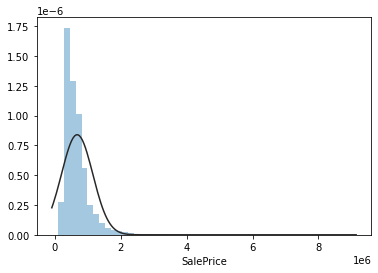

In [83]:
# Histogram of SalePrice
sns.distplot(model_building.SalePrice[model_building.SalePrice > 0], kde=False, fit=stats.norm)

C:\Users\bonne\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 432x288 with 0 Axes>

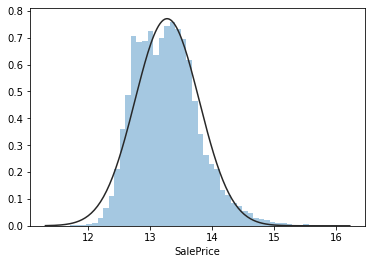

<Figure size 432x288 with 0 Axes>

In [84]:
# Apply log transformation to SalePrice and then examine the histogram again
model_building.SalePrice = np.log(model_building.SalePrice)
sns.distplot(model_building.SalePrice, kde=False, fit=stats.norm)
plt.figure()

C:\Users\bonne\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Major'>

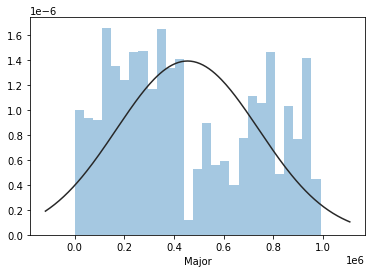

In [85]:
# # Histogram of Major
sns.distplot(model_building.Major[model_building.Major > 0], kde=False, fit=stats.norm)

In [86]:
# Major does not need a log transformation

C:\Users\bonne\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Minor'>

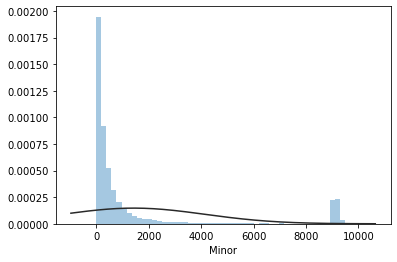

In [87]:
# Histogram of Minor
sns.distplot(ResidentialBuilding_data_copy1.Minor, kde=False, fit=stats.norm)

C:\Users\bonne\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 432x288 with 0 Axes>

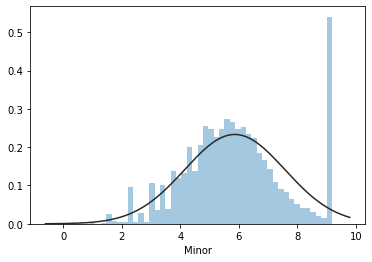

<Figure size 432x288 with 0 Axes>

In [88]:
# Apply log transformation to Minor and then examine the histogram again
ResidentialBuilding_data_copy1.Minor = np.log(ResidentialBuilding_data_copy1.Minor)
sns.distplot(ResidentialBuilding_data_copy1.Minor, kde=False, fit=stats.norm)
plt.figure()

C:\Users\bonne\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ZipCode'>

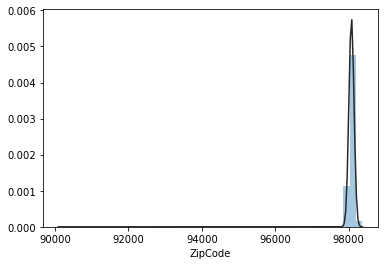

In [89]:
# Histogram of ZipCode
sns.distplot(ResidentialBuilding_data_copy1.ZipCode, kde=False, fit=stats.norm)

In [90]:
# ZipCode does not need a log transformation

C:\Users\bonne\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Stories'>

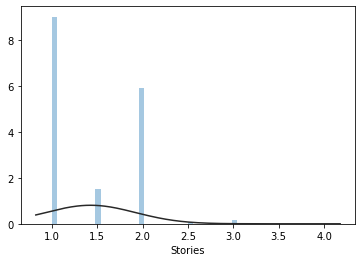

In [91]:
# Histogram of Stories
sns.distplot(ResidentialBuilding_data_copy1.Stories, kde=False, fit=stats.norm)

In [92]:
# Stories does not need a log transformation

C:\Users\bonne\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BldgGrade'>

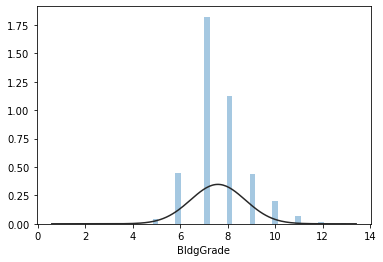

In [93]:
# Histogram of BldgGrade
sns.distplot(ResidentialBuilding_data_copy1.BldgGrade, kde=False, fit=stats.norm)

In [94]:
# BldgGrade does not need a log tranformation

C:\Users\bonne\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SqFt1stFloor'>

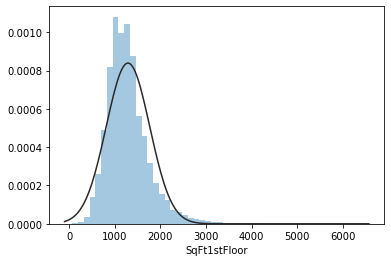

In [95]:
# Histogram of SqFt1stFloor
sns.distplot(ResidentialBuilding_data_copy1.SqFt1stFloor, kde=False, fit=stats.norm)

C:\Users\bonne\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 432x288 with 0 Axes>

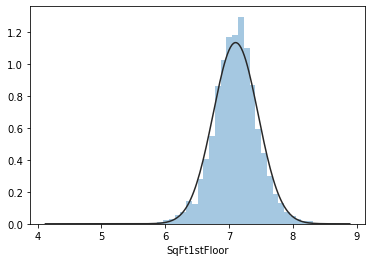

<Figure size 432x288 with 0 Axes>

In [96]:
# Apply log transformation to SqFt1stFloor and then examine the histogram again
ResidentialBuilding_data_copy1.SqFt1stFloor = np.log(ResidentialBuilding_data_copy1.SqFt1stFloor)
sns.distplot(ResidentialBuilding_data_copy1.SqFt1stFloor, kde=False, fit=stats.norm)
plt.figure()

C:\Users\bonne\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SqFtHalfFloor'>

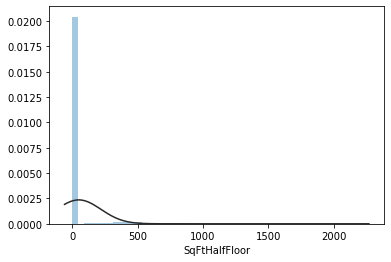

In [97]:
# Histogram of SqFtHalfFloor
sns.distplot(ResidentialBuilding_data_copy1.SqFtHalfFloor, kde=False, fit=stats.norm)

C:\Users\bonne\Anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\bonne\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\bonne\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


ValueError: cannot convert float NaN to integer

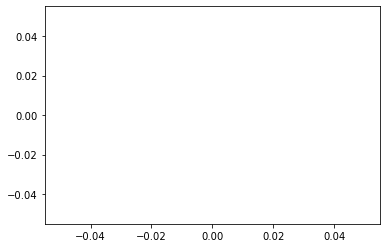

In [98]:
# Apply log transformation to SqFtHalfFloor and then examine the histogram again
ResidentialBuilding_data_copy1.SqFtHalfFloor = np.log(ResidentialBuilding_data_copy1.SqFtHalfFloor)
sns.distplot(ResidentialBuilding_data_copy1.SqFtHalfFloor, kde=False, fit=stats.norm)
plt.figure()

In [ ]:
# Histogram of SqFt2ndFloor
sns.distplot(ResidentialBuilding_data_copy1.SqFt2ndFloor, kde=False, fit=stats.norm)

In [ ]:
# Apply log transformation to SqFt2ndFloor and then examine the histogram again
ResidentialBuilding_data_copy1.SqFt2ndFloor = np.log(ResidentialBuilding_data_copy1.SqFt2ndFloor)
sns.distplot(ResidentialBuilding_data_copy1.SqFt2ndFloor, kde=False, fit=stats.norm)
plt.figure()

In [ ]:
# Histogram of SqFtUpperFloor
sns.distplot(ResidentialBuilding_data_copy1.SqFtUpperFloor, kde=False, fit=stats.norm)

In [ ]:
# Apply log transformation to SqFtUpperFloor and then examine the histogram again
ResidentialBuilding_data_copy1.SqFtUpperFloor = np.log(ResidentialBuilding_data_copy1.SqFtUpperFloor)
sns.distplot(ResidentialBuilding_data_copy1.SqFtUpperFloor, kde=False, fit=stats.norm)
plt.figure()

In [ ]:
# Histogram of SqFtUnfinFull
sns.distplot(ResidentialBuilding_data_copy1.SqFtUnfinFull, kde=False, fit=stats.norm)

ValueError: cannot convert float NaN to integer

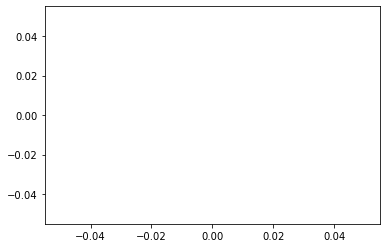

In [99]:
# Apply log transformation to SqFtUnfinFull and then examine the histogram again
ResidentialBuilding_data_copy1.SqFtUnfinFull = np.log(ResidentialBuilding_data_copy1.SqFtUnfinFull)
sns.distplot(ResidentialBuilding_data_copy1.SqFtUnfinFull, kde=False, fit=stats.norm)
plt.figure()

<AxesSubplot:xlabel='SqFtUnfinHalf'>

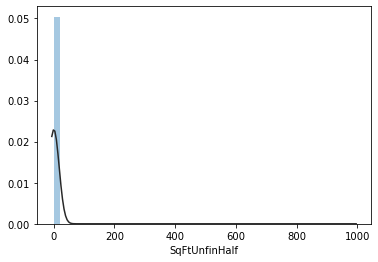

In [100]:
# Histogram of SqFtUnfinHalf
sns.distplot(ResidentialBuilding_data_copy1.SqFtUnfinHalf, kde=False, fit=stats.norm)

C:\Users\bonne\Anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\bonne\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\bonne\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


ValueError: cannot convert float NaN to integer

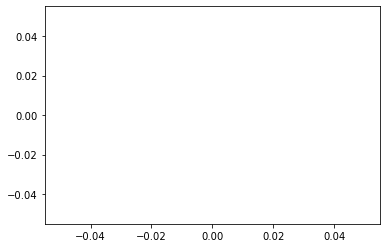

In [101]:
# Apply log transformation to SqFtUnfinHalf and then examine the histogram again
ResidentialBuilding_data_copy1.SqFtUnfinHalf = np.log(ResidentialBuilding_data_copy1.SqFtUnfinHalf)
sns.distplot(ResidentialBuilding_data_copy1.SqFtUnfinHalf, kde=False, fit=stats.norm)
plt.figure()

<AxesSubplot:xlabel='SqFtTotLiving'>

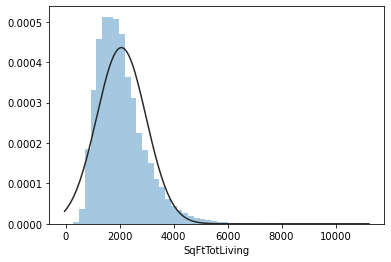

In [102]:
# Histogram of SqFtTotLiving
sns.distplot(ResidentialBuilding_data_copy1.SqFtTotLiving, kde=False, fit=stats.norm)

C:\Users\bonne\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 432x288 with 0 Axes>

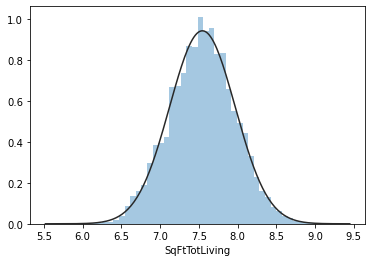

<Figure size 432x288 with 0 Axes>

In [103]:
# Apply log transformation to SqFtTotLiving and then examine the histogram again
ResidentialBuilding_data_copy1.SqFtTotLiving = np.log(ResidentialBuilding_data_copy1.SqFtTotLiving)
sns.distplot(ResidentialBuilding_data_copy1.SqFtTotLiving, kde=False, fit=stats.norm)
plt.figure()

C:\Users\bonne\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SqFtTotBasement'>

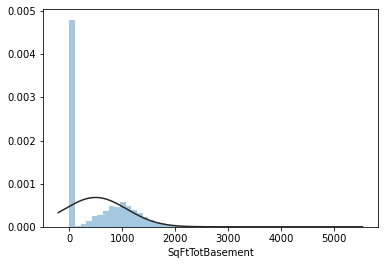

In [104]:
# Histogram of SqFtTotBasement
sns.distplot(ResidentialBuilding_data_copy1.SqFtTotBasement, kde=False, fit=stats.norm)

C:\Users\bonne\Anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\bonne\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\bonne\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


ValueError: cannot convert float NaN to integer

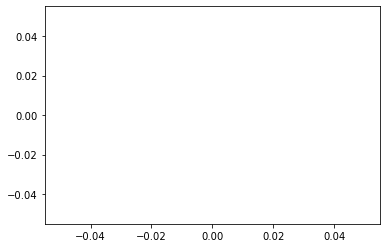

In [105]:
# Apply log transformation to SqFtTotBasement and then examine the histogram again
ResidentialBuilding_data_copy1.SqFtTotBasement = np.log(ResidentialBuilding_data_copy1.SqFtTotBasement)
sns.distplot(ResidentialBuilding_data_copy1.SqFtTotBasement, kde=False, fit=stats.norm)
plt.figure()

In [ ]:
# Histogram of SqFtFinBasement
sns.distplot(ResidentialBuilding_data_copy1.SqFtFinBasement, kde=False, fit=stats.norm)

In [ ]:
# Apply log transformation to SqFtFinBasement and then examine the histogram again
ResidentialBuilding_data_copy1.SqFtFinBasement = np.log(ResidentialBuilding_data_copy1.SqFtFinBasement)
sns.distplot(ResidentialBuilding_data_copy1.SqFtFinBasement, kde=False, fit=stats.norm)
plt.figure()

In [ ]:
# Histogram of FinBasementGrade
sns.distplot(ResidentialBuilding_data_copy1.FinBasementGrade, kde=False, fit=stats.norm)

ValueError: cannot convert float NaN to integer

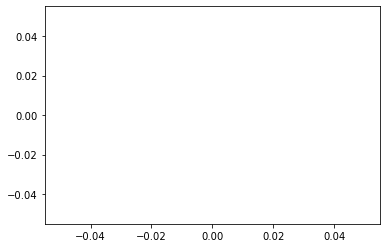

In [106]:
# Apply log transformation to FinBasementGrade and then examine the histogram again
ResidentialBuilding_data_copy1.FinBasementGrade = np.log(ResidentialBuilding_data_copy1.FinBasementGrade)
sns.distplot(ResidentialBuilding_data_copy1.FinBasementGrade, kde=False, fit=stats.norm)
plt.figure()

<AxesSubplot:xlabel='SqFtGarageBasement'>

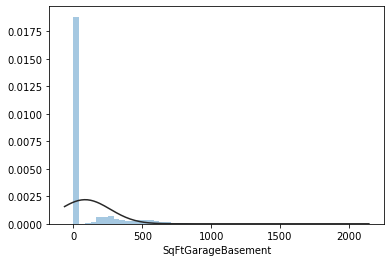

In [107]:
# Histogram of SqFtGarageBasement
sns.distplot(ResidentialBuilding_data_copy1.SqFtGarageBasement, kde=False, fit=stats.norm)

C:\Users\bonne\Anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\bonne\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\bonne\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


ValueError: cannot convert float NaN to integer

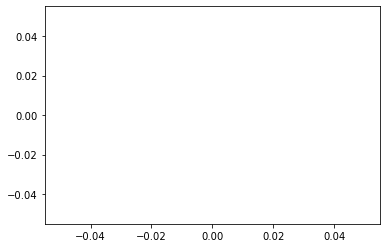

In [108]:
# Apply log transformation to SqFtGarageBasement and then examine the histogram again
ResidentialBuilding_data_copy1.SqFtGarageBasement = np.log(ResidentialBuilding_data_copy1.SqFtGarageBasement)
sns.distplot(ResidentialBuilding_data_copy1.SqFtGarageBasement, kde=False, fit=stats.norm)
plt.figure()

In [ ]:
# Histogram of SqFtGarageAttached
sns.distplot(ResidentialBuilding_data_copy1.SqFtGarageAttached, kde=False, fit=stats.norm)

ValueError: cannot convert float NaN to integer

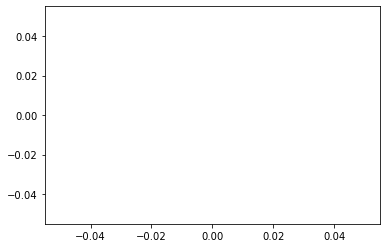

In [109]:
# Apply log transformation to SqFtGarageAttached and then examine the histogram again
ResidentialBuilding_data_copy1.SqFtGarageAttached = np.log(ResidentialBuilding_data_copy1.SqFtGarageAttached)
sns.distplot(ResidentialBuilding_data_copy1.SqFtGarageAttached, kde=False, fit=stats.norm)
plt.figure()

In [ ]:
# Histogram of SqFtOpenPorch
sns.distplot(ResidentialBuilding_data_copy1.SqFtOpenPorch, kde=False, fit=stats.norm)

ValueError: cannot convert float NaN to integer

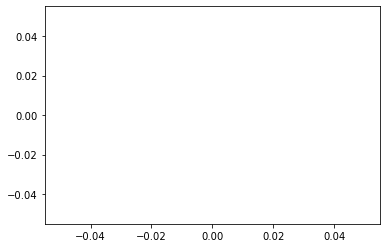

In [110]:
# Apply log transformation to SqFtOpenPorch and then examine the histogram again
ResidentialBuilding_data_copy1.SqFtOpenPorch = np.log(ResidentialBuilding_data_copy1.SqFtOpenPorch)
sns.distplot(ResidentialBuilding_data_copy1.SqFtOpenPorch, kde=False, fit=stats.norm)
plt.figure()

<AxesSubplot:xlabel='SqFtEnclosedPorch'>

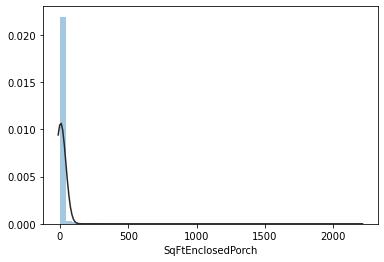

In [111]:
# Histogram of SqFtEnclosedPorch
sns.distplot(ResidentialBuilding_data_copy1.SqFtEnclosedPorch, kde=False, fit=stats.norm)

C:\Users\bonne\Anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\bonne\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\bonne\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


ValueError: cannot convert float NaN to integer

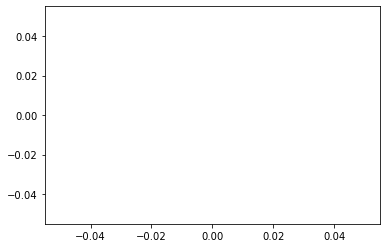

In [112]:
# Apply log transformation to SqFtEnclosedPorch and then examine the histogram again
ResidentialBuilding_data_copy1.SqFtEnclosedPorch = np.log(ResidentialBuilding_data_copy1.SqFtEnclosedPorch)
sns.distplot(ResidentialBuilding_data_copy1.SqFtEnclosedPorch, kde=False, fit=stats.norm)
plt.figure()

In [ ]:
# Histogram of SqFtDeck
sns.distplot(ResidentialBuilding_data_copy1.SqFtDeck, kde=False, fit=stats.norm)

ValueError: cannot convert float NaN to integer

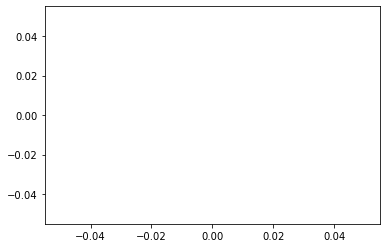

In [113]:
# Apply log transformation to SqFtDeck and then examine the histogram again
ResidentialBuilding_data_copy1.SqFtDeck= np.log(ResidentialBuilding_data_copy1.SqFtDeck)
sns.distplot(ResidentialBuilding_data_copy1.SqFtDeck, kde=False, fit=stats.norm)
plt.figure()

<AxesSubplot:xlabel='BrickStone'>

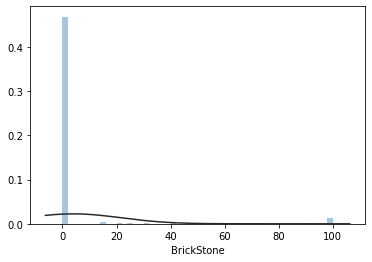

In [114]:
# Histogram of Bricktone
sns.distplot(ResidentialBuilding_data_copy1.BrickStone, kde=False, fit=stats.norm)

C:\Users\bonne\Anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\bonne\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\bonne\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


ValueError: cannot convert float NaN to integer

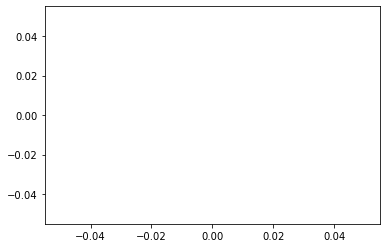

In [115]:
# Apply log transformation to BrickStone and then examine the histogram again
ResidentialBuilding_data_copy1.BrickStone= np.log(ResidentialBuilding_data_copy1.BrickStone)
sns.distplot(ResidentialBuilding_data_copy1.BrickStone, kde=False, fit=stats.norm)
plt.figure()

<AxesSubplot:xlabel='Bedrooms'>

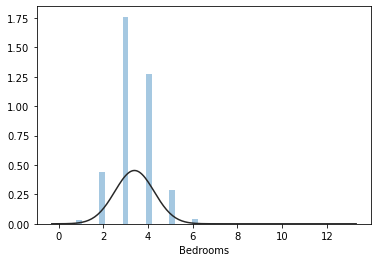

In [116]:
# Histogram of Bedrooms
sns.distplot(ResidentialBuilding_data_copy1.Bedrooms, kde=False, fit=stats.norm)

In [117]:
# Bedrooms does not need a log transformation

C:\Users\bonne\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BathHalfCount'>

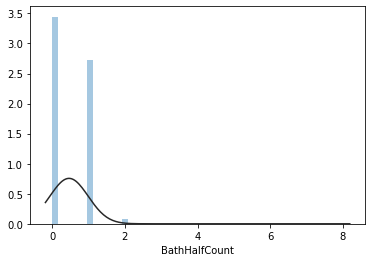

In [118]:
# Histogram of BathHalfCount
sns.distplot(ResidentialBuilding_data_copy1.BathHalfCount, kde=False, fit=stats.norm)

<Figure size 432x288 with 0 Axes>

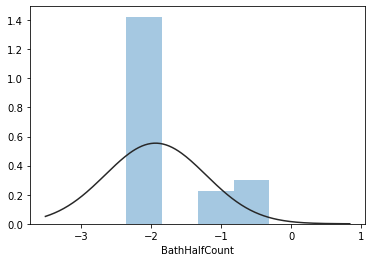

<Figure size 432x288 with 0 Axes>

In [146]:
# Apply log transformation to BathHalfCount and then examine the histogram again
ResidentialBuilding_data_copy1.BathHalfCount= np.log(ResidentialBuilding_data_copy1.BathHalfCount)
sns.distplot(ResidentialBuilding_data_copy1.BathHalfCount, kde=False, fit=stats.norm)
plt.figure()

C:\Users\bonne\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Bath3qtrCount'>

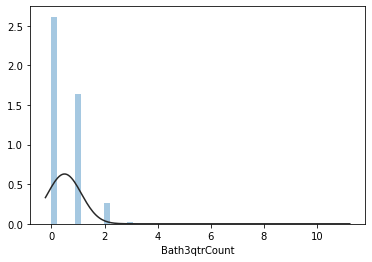

In [147]:
# Histogram of Bath3qtrCount
sns.distplot(ResidentialBuilding_data_copy1.Bath3qtrCount, kde=False, fit=stats.norm)

C:\Users\bonne\Anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\bonne\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 432x288 with 0 Axes>

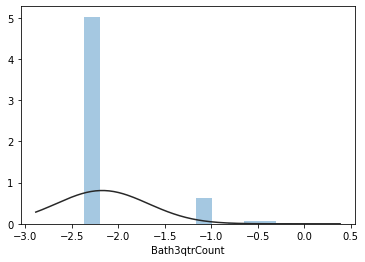

<Figure size 432x288 with 0 Axes>

In [151]:
# Apply log transformation to Bath3qtrCount and then examine the histogram again
ResidentialBuilding_data_copy1.Bath3qtrCount= np.log(ResidentialBuilding_data_copy1.Bath3qtrCount)
sns.distplot(ResidentialBuilding_data_copy1.Bath3qtrCount, kde=False, fit=stats.norm)
plt.figure()

C:\Users\bonne\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BathFullCount'>

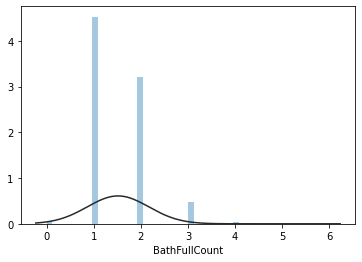

In [152]:
# Histogram of BathFullCount
sns.distplot(ResidentialBuilding_data_copy1.BathFullCount, kde=False, fit=stats.norm)

In [153]:
# BathFullCount does not need a log transformation

C:\Users\bonne\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='FpSingleStory'>

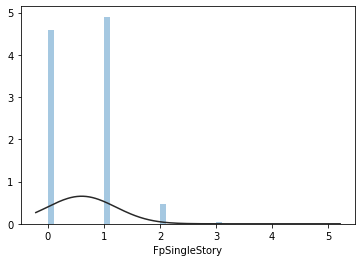

In [154]:
# Histogram of FpSingleStory
sns.distplot(ResidentialBuilding_data_copy1.FpSingleStory, kde=False, fit=stats.norm)

In [155]:
# FpSingleStory does not need a log transformation

C:\Users\bonne\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='FpMultiStory'>

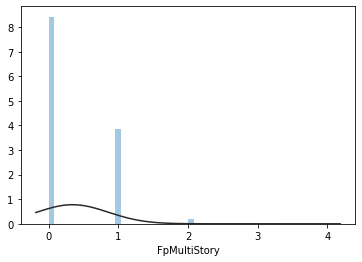

In [156]:
# Histogram of FpMultiStory
sns.distplot(ResidentialBuilding_data_copy1.FpMultiStory, kde=False, fit=stats.norm)

In [157]:
# FpMultiStory does not need a log transformation

C:\Users\bonne\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='FpFreestanding'>

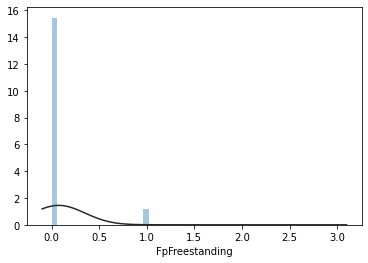

In [158]:
# Histogram of FpFreestanding
sns.distplot(ResidentialBuilding_data_copy1.FpFreestanding, kde=False, fit=stats.norm)

In [159]:
# FpFreestanding does not need a log transformation

C:\Users\bonne\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='FpAdditional'>

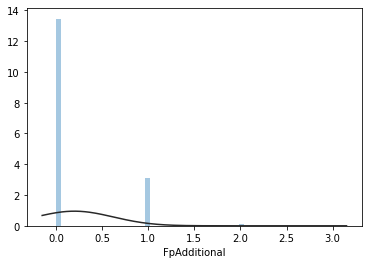

In [160]:
# Histogram of FpAdditional
sns.distplot(ResidentialBuilding_data_copy1.FpAdditional, kde=False, fit=stats.norm)

In [161]:
# FpAdditional does not need a log transformation

C:\Users\bonne\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Condition'>

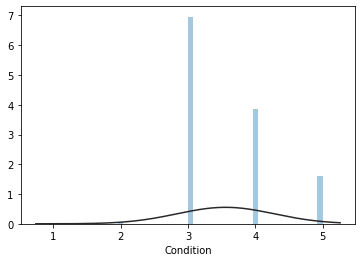

In [162]:
# Histogram of Condition
sns.distplot(ResidentialBuilding_data_copy1.Condition, kde=False, fit=stats.norm)

C:\Users\bonne\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 432x288 with 0 Axes>

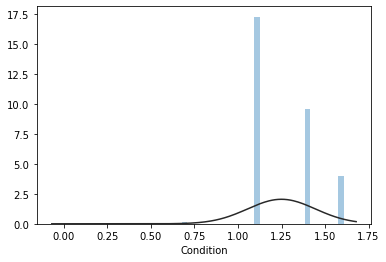

<Figure size 432x288 with 0 Axes>

In [163]:
# Apply log transformation to Condition and then examine the histogram again
ResidentialBuilding_data_copy1.Condition = np.log(ResidentialBuilding_data_copy1.Condition)
sns.distplot(ResidentialBuilding_data_copy1.Condition, kde=False, fit=stats.norm)
plt.figure()

C:\Users\bonne\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AddnlCost'>

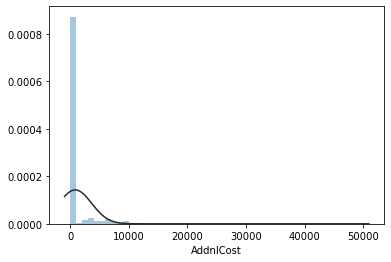

In [164]:
# Histogram of AddnlCost
sns.distplot(ResidentialBuilding_data_copy1.AddnlCost, kde=False, fit=stats.norm)

C:\Users\bonne\Anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Figure size 432x288 with 0 Axes>

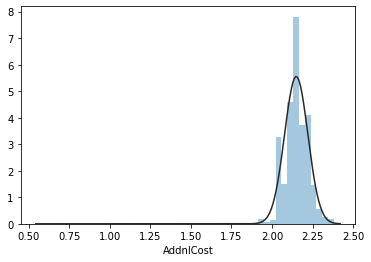

<Figure size 432x288 with 0 Axes>

In [166]:
# Apply log transformation to AddnlCost and then examine the histogram again
ResidentialBuilding_data_copy1.AddnlCost = np.log(ResidentialBuilding_data_copy1.AddnlCost)
sns.distplot(ResidentialBuilding_data_copy1.AddnlCost, kde=False, fit=stats.norm)
plt.figure()

C:\Users\bonne\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TransactionYear'>

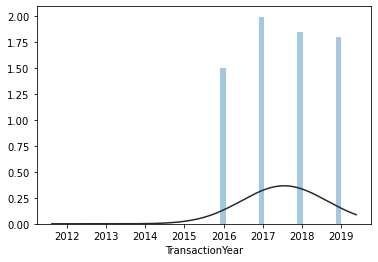

In [167]:
# Histogram of TransactionYear
sns.distplot(ResidentialBuilding_data_copy1.TransactionYear, kde=False, fit=stats.norm)

In [168]:
# TransactionYear does not need a log transformation

C:\Users\bonne\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='RenovationAge'>

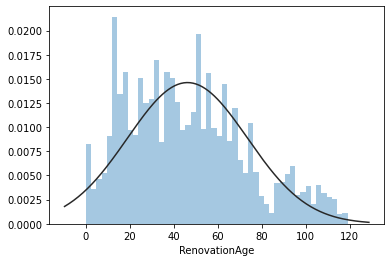

In [169]:
# Histogram of RenovationAge
sns.distplot(ResidentialBuilding_data_copy1.RenovationAge, kde=False, fit=stats.norm)

In [170]:
# RenovationAge does not need a log transformation

C:\Users\bonne\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

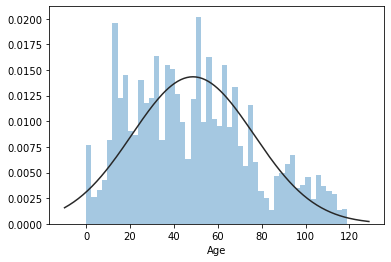

In [171]:
# Histogram of Age
sns.distplot(ResidentialBuilding_data_copy1.Age, kde=False, fit=stats.norm)

In [172]:
# Age does not need a log transformation

In [173]:
(ResidentialBuilding_data_copy1 == 0).sum(axis=0)

Major                     0
DocumentDate              0
Minor                     5
DirectionPrefix           0
ZipCode                   0
Stories                   0
BldgGrade                 0
SqFt1stFloor              0
SqFtHalfFloor             0
SqFt2ndFloor              0
SqFtUpperFloor            0
SqFtUnfinFull             0
SqFtUnfinHalf             0
SqFtTotLiving             0
SqFtTotBasement           0
SqFtFinBasement           0
FinBasementGrade          0
SqFtGarageBasement        0
SqFtGarageAttached        0
DaylightBasement          0
SqFtOpenPorch             0
SqFtEnclosedPorch         0
SqFtDeck                  0
BrickStone                0
Bedrooms                 22
BathHalfCount             0
Bath3qtrCount             0
BathFullCount           332
FpSingleStory         19481
FpMultiStory          28677
FpFreestanding        39446
FpAdditional          34361
Condition                28
AddnlCost                 0
SalePrice                 0
TransactionYear     

In [385]:
# Create a new field, Has bedrooms for dummy variable separating zeros
ResidentialBuilding_data_copy1['Has_bedrooms'] = np.where(ResidentialBuilding_data_copy1.Bedrooms == 0, 0,1)

In [386]:
# Create a new field, Has FpSingleStory for dummy variable separating zeros
ResidentialBuilding_data_copy1['Has_FpSingleStory'] = np.where(ResidentialBuilding_data_copy1.FpSingleStory == 0, 0,1)

In [387]:
# Create a new field, Has FpMultiStory for dummy variable separating zeros
ResidentialBuilding_data_copy1['Has_FpMultiStory'] = np.where(ResidentialBuilding_data_copy1.FpMultiStory == 0, 0,1)

In [388]:
ResidentialBuilding_data_copy1 = ResidentialBuilding_data_copy1.loc[ResidentialBuilding_data_copy1.Has_bedrooms == 1]

In [389]:
ResidentialBuilding_data_copy1 = ResidentialBuilding_data_copy1.loc[ResidentialBuilding_data_copy1.Has_FpSingleStory == 1]

In [390]:
ResidentialBuilding_data_copy1 = ResidentialBuilding_data_copy1.loc[ResidentialBuilding_data_copy1.Has_FpMultiStory == 1]

In [391]:
ResidentialBuilding_data_copy1

,Major,DocumentDate,Minor,DirectionPrefix,ZipCode,Stories,BldgGrade,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,...,FpAdditional,Condition,AddnlCost,SalePrice,TransactionYear,RenovationAge,Age,Has_bedrooms,Has_FpSingleStory,Has_FpMultiStory
1,421940,2019-08-29,6.075346,,98105,1.5,9,7.222566,1.890106,NaN,...,0,1.098612,NaN,14.018451,2019,92.0,92.0,1,1,1
28,92606,2019-08-28,9.114710,,98077,2.0,10,7.615791,NaN,1.945043,...,0,1.098612,NaN,13.856653,2019,29.0,29.0,1,1,1
33,172203,2019-08-28,9.113499,SW,98070,2.0,8,7.565275,NaN,1.943724,...,0,1.098612,NaN,14.133964,2019,33.0,50.0,1,1,1
53,286920,2019-08-27,5.010635,,98052,2.0,10,7.333023,NaN,2.000985,...,0,1.098612,NaN,14.220976,2019,19.0,19.0,1,1,1
56,503530,2019-08-27,6.558198,W,98199,2.0,8,7.358831,NaN,1.905300,...,1,1.386294,NaN,14.707509,2019,77.0,77.0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42428,560801,2016-07-21,6.845880,NW,98027,2.0,9,7.358831,NaN,1.985037,...,0,1.098612,2.080237,13.748302,2016,21.0,21.0,1,1,1
42432,429810,2016-07-21,5.736572,,98077,2.0,9,7.306531,NaN,1.948918,...,0,1.098612,NaN,13.500800,2016,23.0,23.0,1,1,1
42447,788090,2016-07-20,4.605170,NE,98074,2.0,9,7.570443,NaN,1.897925,...,0,1.098612,NaN,13.635187,2016,28.0,28.0,1,1,1
42470,195170,2016-07-15,5.347108,,98006,2.0,8,7.279319,NaN,1.923647,...,0,1.386294,NaN,13.658857,2016,49.0,49.0,1,1,1


In [392]:
(ResidentialBuilding_data_copy1 == 0).sum(axis=0)

Major                    0
DocumentDate             0
Minor                    0
DirectionPrefix          0
ZipCode                  0
Stories                  0
BldgGrade                0
SqFt1stFloor             0
SqFtHalfFloor            0
SqFt2ndFloor             0
SqFtUpperFloor           0
SqFtUnfinFull            0
SqFtUnfinHalf            0
SqFtTotLiving            0
SqFtTotBasement          0
SqFtFinBasement          0
FinBasementGrade         0
SqFtGarageBasement       0
SqFtGarageAttached       0
DaylightBasement         0
SqFtOpenPorch            0
SqFtEnclosedPorch        0
SqFtDeck                 0
BrickStone               0
Bedrooms                 0
BathHalfCount            0
Bath3qtrCount            0
BathFullCount            5
FpSingleStory            0
FpMultiStory             0
FpFreestanding        2003
FpAdditional          1662
Condition                1
AddnlCost                0
SalePrice                0
TransactionYear          0
RenovationAge            1
A

In [96]:
import seaborn as sns
def create_scatter_plots(col, lowess_arg = True, order_arg=1):
    plt.figure()
    sns.regplot(x=col, y='SalePrice_Log', data=model_building, lowess=lowess_arg, order=order_arg, ci=None, truncate=True, line_kws={'color':'black'})

In [97]:
plot_columns2 = ['SqFtTotLiving_Log','BldgGrade', 'SqFtTotBasement', 'Bedrooms', 'BathFullCount','RenovationAge', 'Age', 'Average_PricePerSqFoot', 'Condition', 'TransactionYear']

for col in plot_columns2:
    create_scatter_plots(col)
plt.close()

KeyError: 'SqFtTotLiving_Log'

<Figure size 432x288 with 0 Axes>

<AxesSubplot:xlabel='Major', ylabel='SalePrice'>

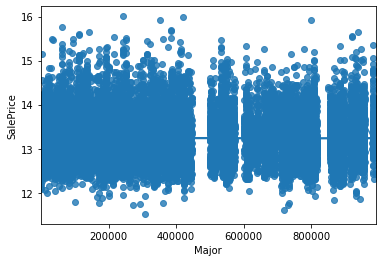

In [227]:
import seaborn as sns
# Major respective to saleprice
sns.regplot(x = "Major", y="SalePrice", data=model_building[model_building.Major > 0], lowess=True)

<AxesSubplot:xlabel='Minor', ylabel='SalePrice'>

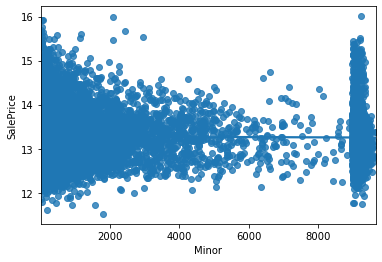

In [228]:
# Minor respective to saleprice
sns.regplot(x = "Minor", y="SalePrice", data=model_building[model_building.Minor > 0],lowess=True)

<AxesSubplot:xlabel='ZipCode', ylabel='SalePrice'>

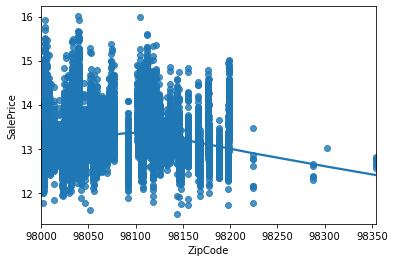

In [221]:
# ZipCode respective to saleprice
sns.regplot(x = "ZipCode", y="SalePrice", data=model_building, lowess=True)

<AxesSubplot:xlabel='Stories', ylabel='SalePrice'>

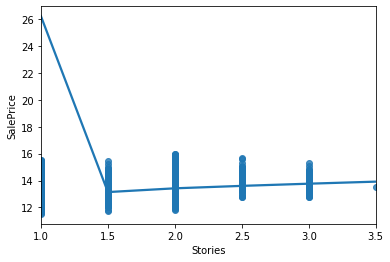

In [222]:
# Stories respective to saleprice (??)
sns.regplot(x = "Stories", y="SalePrice", data=model_building, lowess=True)

<AxesSubplot:xlabel='BldgGrade', ylabel='SalePrice'>

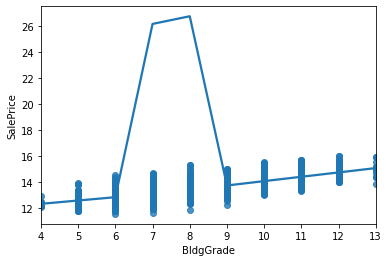

In [223]:
# BldgGrade respective to saleprice (??)
sns.regplot(x = "BldgGrade", y="SalePrice", data=model_building, lowess=True)

<AxesSubplot:xlabel='SqFt1stFloor', ylabel='SalePrice'>

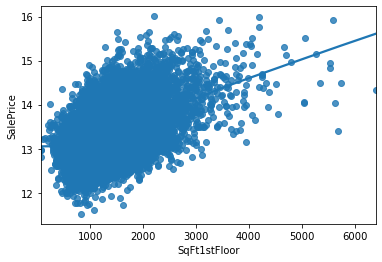

In [224]:
# SqFt1stFloor respective to saleprice (??)
sns.regplot(x = "SqFt1stFloor", y="SalePrice", data=model_building, lowess=True)

C:\Users\bonne\Anaconda3\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:214: RuntimeWarning: invalid value encountered in true_divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


<AxesSubplot:xlabel='SqFtHalfFloor', ylabel='SalePrice'>

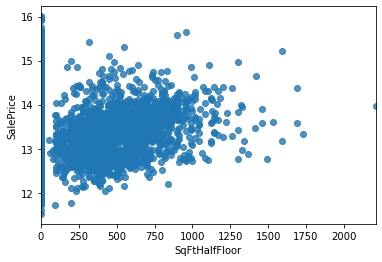

In [226]:
# SqFtHalfFloor respective to saleprice 
sns.regplot(x = "SqFtHalfFloor", y="SalePrice", data=model_building, lowess=True)

<AxesSubplot:xlabel='SqFt2ndFloor', ylabel='SalePrice'>

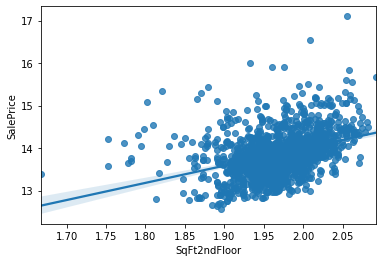

In [400]:
# SqFt2ndFloor respective to saleprice 
sns.regplot(x = "SqFt2ndFloor", y="SalePrice", data=ResidentialBuilding_data_copy1)

<AxesSubplot:xlabel='SqFtUpperFloor', ylabel='SalePrice'>

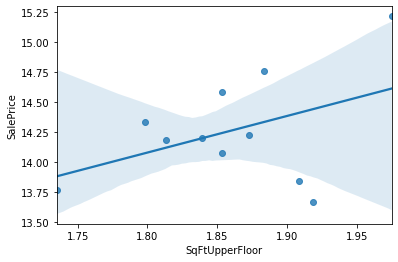

In [401]:
# SqFtUpperFloor respective to saleprice (??)
sns.regplot(x = "SqFtUpperFloor", y="SalePrice", data=ResidentialBuilding_data_copy1)

<AxesSubplot:xlabel='SqFtUpperFloor', ylabel='SalePrice'>

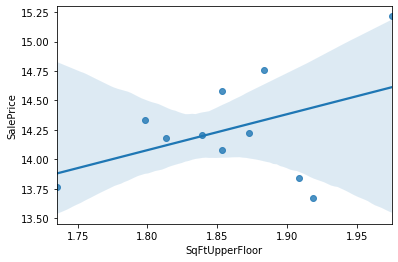

In [402]:
# SqFtUnfinFull respective to saleprice (??)
sns.regplot(x = "SqFtUpperFloor", y="SalePrice", data=ResidentialBuilding_data_copy1)

<AxesSubplot:xlabel='SqFtUnfinFull', ylabel='SalePrice'>

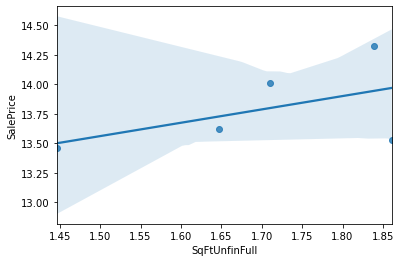

In [403]:
# SqFtUnfinFull respective to saleprice 
sns.regplot(x = "SqFtUnfinFull", y="SalePrice", data=ResidentialBuilding_data_copy1)

<AxesSubplot:xlabel='SqFtUnfinHalf', ylabel='SalePrice'>

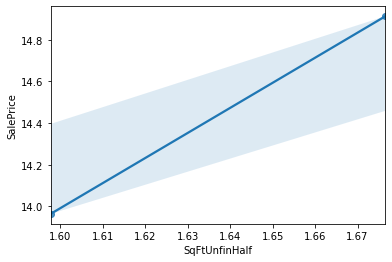

In [404]:
# SqFtUnfinHalf respective to saleprice (??)
sns.regplot(x = "SqFtUnfinHalf", y="SalePrice", data=ResidentialBuilding_data_copy1)

<AxesSubplot:xlabel='SqFtTotLiving', ylabel='SalePrice'>

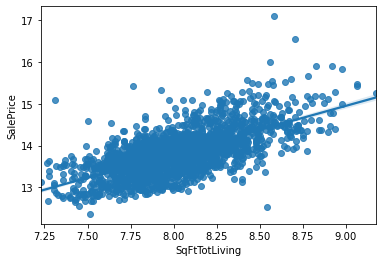

In [405]:
# SqFtTotLiving respective to saleprice (??)
sns.regplot(x = "SqFtTotLiving", y="SalePrice", data=ResidentialBuilding_data_copy1)

<AxesSubplot:xlabel='SqFtTotBasement', ylabel='SalePrice'>

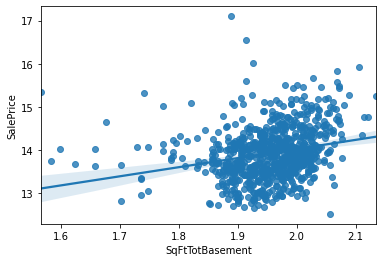

In [406]:
# SqFtTotBasement respective to saleprice (??)
sns.regplot(x = "SqFtTotBasement", y="SalePrice", data=ResidentialBuilding_data_copy1)

<AxesSubplot:xlabel='SqFtFinBasement', ylabel='SalePrice'>

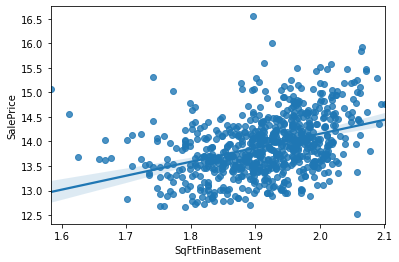

In [407]:
# SqFtFinBasement respective to saleprice (??)
sns.regplot(x = "SqFtFinBasement", y="SalePrice", data=ResidentialBuilding_data_copy1)

<AxesSubplot:xlabel='FinBasementGrade', ylabel='SalePrice'>

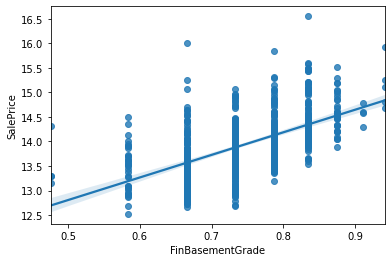

In [408]:
# FinBasementGrade respective to saleprice (??)
sns.regplot(x = "FinBasementGrade", y="SalePrice", data=ResidentialBuilding_data_copy1)

<AxesSubplot:xlabel='SqFtGarageBasement', ylabel='SalePrice'>

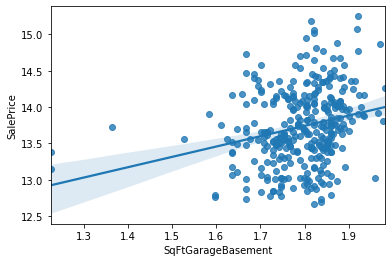

In [409]:
# SqFtGarageBasement respective to saleprice (??)
sns.regplot(x = "SqFtGarageBasement", y="SalePrice", data=ResidentialBuilding_data_copy1)

<AxesSubplot:xlabel='SqFtGarageAttached', ylabel='SalePrice'>

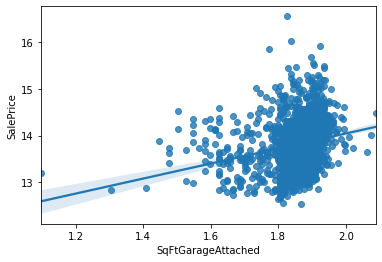

In [410]:
# SqFtGarageAttached respective to saleprice (??)
sns.regplot(x = "SqFtGarageAttached", y="SalePrice", data=ResidentialBuilding_data_copy1)

<AxesSubplot:xlabel='SqFtOpenPorch', ylabel='SalePrice'>

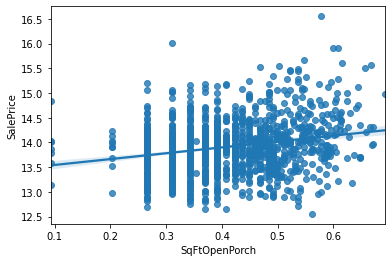

In [411]:
# SqFtOpenPorch respective to saleprice (??)
sns.regplot(x = "SqFtOpenPorch", y="SalePrice", data=ResidentialBuilding_data_copy1)

<AxesSubplot:xlabel='SqFtEnclosedPorch', ylabel='SalePrice'>

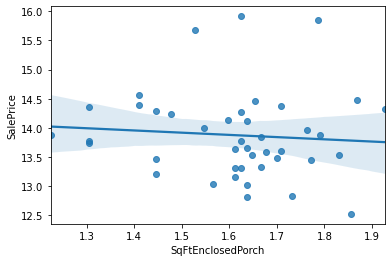

In [412]:
# SqFtEnclosedPorch respective to saleprice (??)
sns.regplot(x = "SqFtEnclosedPorch", y="SalePrice", data=ResidentialBuilding_data_copy1)

<AxesSubplot:xlabel='SqFtDeck', ylabel='SalePrice'>

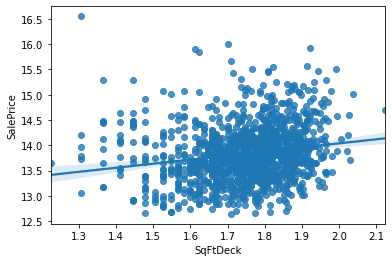

In [413]:
# SqFtDeck respective to saleprice (??)
sns.regplot(x = "SqFtDeck", y="SalePrice", data=ResidentialBuilding_data_copy1)

<AxesSubplot:xlabel='BrickStone', ylabel='SalePrice'>

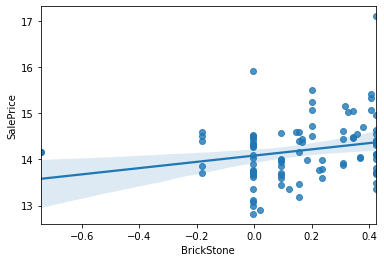

In [414]:
# BrickStone respective to saleprice (??)
sns.regplot(x = "BrickStone", y="SalePrice", data=ResidentialBuilding_data_copy1)

<AxesSubplot:xlabel='Bedrooms', ylabel='SalePrice'>

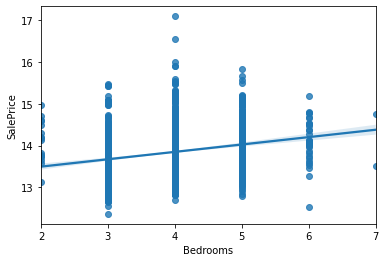

In [415]:
# Bedrooms respective to saleprice (??)
sns.regplot(x = "Bedrooms", y="SalePrice", data=ResidentialBuilding_data_copy1)

<AxesSubplot:xlabel='BathHalfCount', ylabel='SalePrice'>

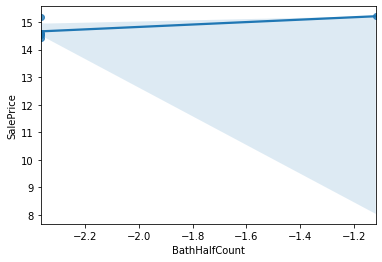

In [416]:
# BathHalfCount respective to saleprice (??)
sns.regplot(x = "BathHalfCount", y="SalePrice", data=ResidentialBuilding_data_copy1)

<AxesSubplot:xlabel='Bath3qtrCount', ylabel='SalePrice'>

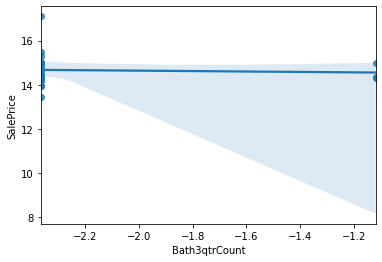

In [417]:
# Bath3qtrCount respective to saleprice (??)
sns.regplot(x = "Bath3qtrCount", y="SalePrice", data=ResidentialBuilding_data_copy1)

<AxesSubplot:xlabel='BathFullCount', ylabel='SalePrice'>

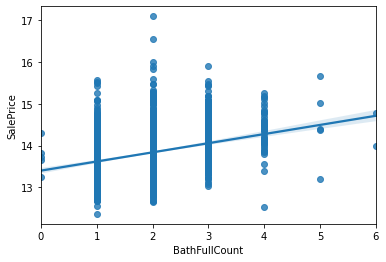

In [418]:
# BathFullCount respective to saleprice (??)
sns.regplot(x = "BathFullCount", y="SalePrice", data=ResidentialBuilding_data_copy1)

<AxesSubplot:xlabel='FpSingleStory', ylabel='SalePrice'>

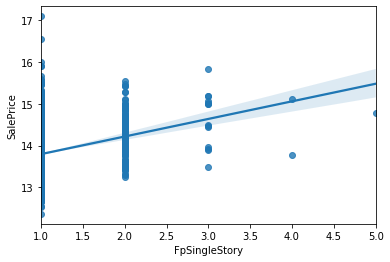

In [419]:
# FpSingleStory respective to saleprice (??)
sns.regplot(x = "FpSingleStory", y="SalePrice", data=ResidentialBuilding_data_copy1)

<AxesSubplot:xlabel='FpMultiStory', ylabel='SalePrice'>

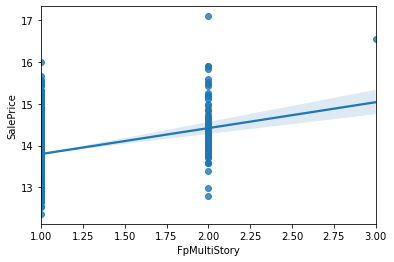

In [420]:
# FpMultiStory respective to saleprice (??)
sns.regplot(x = "FpMultiStory", y="SalePrice", data=ResidentialBuilding_data_copy1)

<AxesSubplot:xlabel='FpFreestanding', ylabel='SalePrice'>

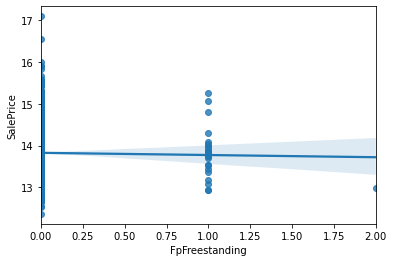

In [421]:
# FpFreestanding respective to saleprice (??)
sns.regplot(x = "FpFreestanding", y="SalePrice", data=ResidentialBuilding_data_copy1)

<AxesSubplot:xlabel='FpAdditional', ylabel='SalePrice'>

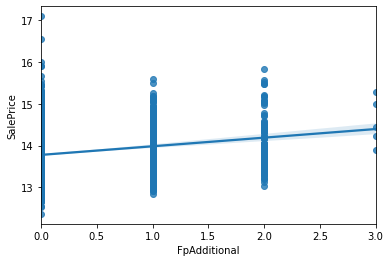

In [422]:
# FpAdditional respective to saleprice (??)
sns.regplot(x = "FpAdditional", y="SalePrice", data=ResidentialBuilding_data_copy1)

<AxesSubplot:xlabel='Condition', ylabel='SalePrice'>

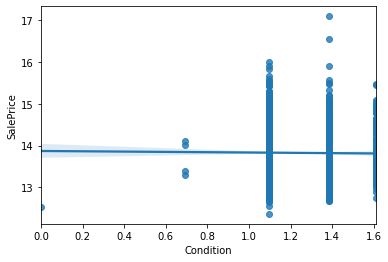

In [423]:
# Condition respective to saleprice (??)
sns.regplot(x = "Condition", y="SalePrice", data=ResidentialBuilding_data_copy1)

<AxesSubplot:xlabel='AddnlCost', ylabel='SalePrice'>

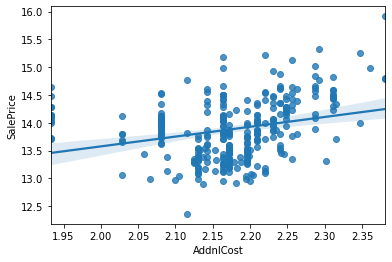

In [424]:
# AddnlCost respective to saleprice (??)
sns.regplot(x = "AddnlCost", y="SalePrice", data=ResidentialBuilding_data_copy1)

<AxesSubplot:xlabel='TransactionYear', ylabel='SalePrice'>

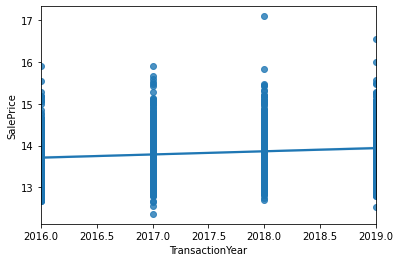

In [425]:
# TransactionYear respective to saleprice (??)
sns.regplot(x = "TransactionYear", y="SalePrice", data=ResidentialBuilding_data_copy1)

<AxesSubplot:xlabel='RenovationAge', ylabel='SalePrice'>

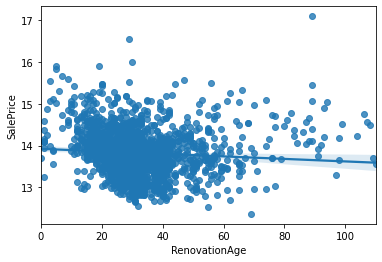

In [426]:
# RenovationAge respective to saleprice (??)
sns.regplot(x = "RenovationAge", y="SalePrice", data=ResidentialBuilding_data_copy1)

<AxesSubplot:xlabel='Age', ylabel='SalePrice'>

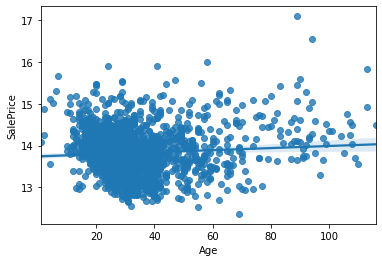

In [427]:
# Age respective to saleprice (??)
sns.regplot(x = "Age", y="SalePrice", data=ResidentialBuilding_data_copy1)

In [119]:
def create_box_and_dist_plots(col):
#    plt.figure()
#    sns.boxplot(x=col[pd.notnull(col)]) #only plot not null values (error if NaN values are plotted)
    plt.figure()    
    sns.distplot(col[pd.notnull(col)], kde=False, fit=stats.norm) 

In [120]:
#I then picked a few variables that I think might be important in predicting sales prices and created 
#a list containing the names of this variables (and SalePrice). I then plot them by looping through the 
#list, each time calling the create_box_and_dist_plots function
plot_columns = ['SalePrice','SqFtTotLiving','BldgGrade', 'SqFtTotBasement', 'Bedrooms', 'BathFullCount', 'Condition','RenovationAge', 'Age', 'PricePerSqFoot', 'Average_PricePerSqFoot']

C:\Users\bonne\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\bonne\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\bonne\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

KeyError: 'PricePerSqFoot'

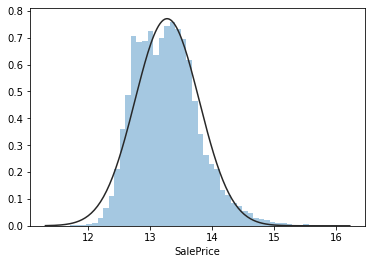

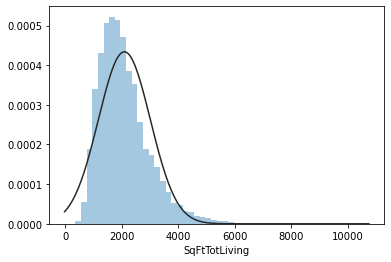

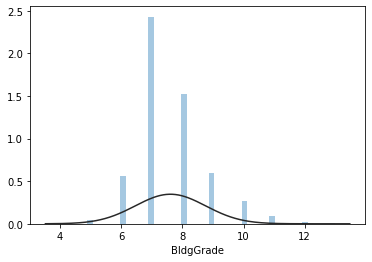

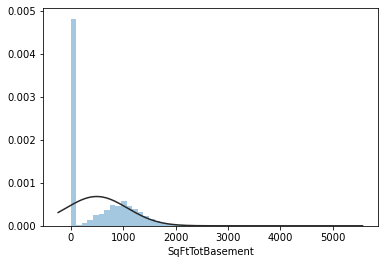

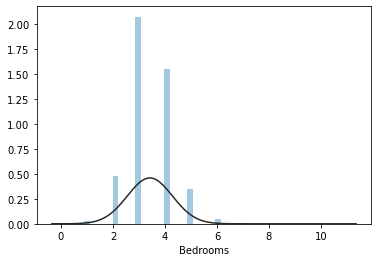

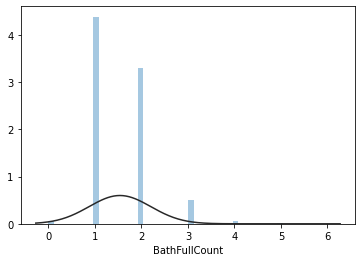

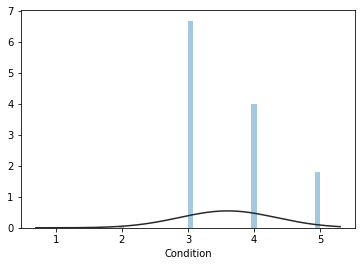

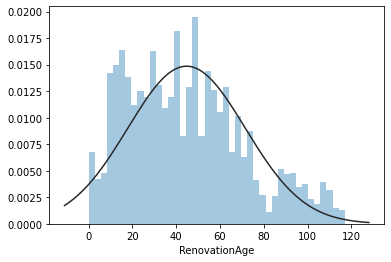

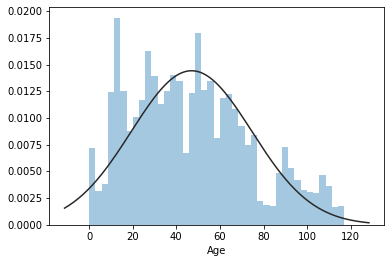

In [121]:
for col in plot_columns:
    create_box_and_dist_plots(model_building[col])

plt.close('all')  # After drawing the figures close them to release it from memory

In [129]:
## Observations ##
# - SalePrice appears slightly skewed, but it is a little difficult to see the data because of outliers.  Let's looks at the distribution 
#of a subsample that excludes the outlier:
argument_1 = model_building.SalePrice[model_building.SalePrice<2500000]
create_box_and_dist_plots(argument_1)
plt.close()

C:\Users\bonne\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


In [130]:
#This more clearly show that SalePrice is skewed and could potentially benefit from a transformation:
model_building['SalePrice_Log'] = np.log(model_building.SalePrice)

In [131]:
#Let's look at the distrubtion after the transformation
create_box_and_dist_plots(model_building.SalePrice_Log)
create_box_and_dist_plots(model_building.SalePrice_Log[model_building.SalePrice<2500000])
plt.close('all')

C:\Users\bonne\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\bonne\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


In [132]:
create_box_and_dist_plots(model_building.SqFtTotLiving[model_building.SqFtTotLiving<6500])
model_building['SqFtTotLiving_Log'] = np.log(model_building.SqFtTotLiving)
create_box_and_dist_plots(model_building.SqFtTotLiving_Log[model_building.SqFtTotLiving<6500])
plt.close('all')

C:\Users\bonne\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\bonne\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


In [197]:
model_building['HasBasement'] = np.where(model_building.SqFtTotBasement==0,0,1)
model_building['HasFpSingleStory'] = np.where(model_building.FpSingleStory == 0,0,1)
model_building['HasFpMultiStory'] = np.where(model_building.FpSingleStory == 0,0,1)
model_building['HasGarage'] = np.where(model_building.SqFtGarageAttached == 0,0,1)
model_building['HasGarageBasement'] = np.where(model_building.SqFtGarageBasement == 0,0,1)

In [ ]:
model_building['Test'] = np.where(model_building.SqFtTotBasement == 0,0,1)

In [134]:
create_box_and_dist_plots(model_building.SqFtTotBasement[model_building.HasBasement==1])
plt.close()

C:\Users\bonne\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


In [135]:
create_box_and_dist_plots(model_building.Condition)
plt.close()

C:\Users\bonne\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


In [136]:
def create_scatter_plots(col, lowess_arg = True, order_arg=1):
    plt.figure()
    sns.regplot(x=col, y='SalePrice_Log', data=model_building, lowess=lowess_arg, order=order_arg, ci=None, truncate=True, line_kws={'color':'black'})
    

In [137]:
plot_columns2 = ['SqFtTotLiving_Log','BldgGrade', 'SqFtTotBasement', 'Bedrooms', 'BathFullCount','RenovationAge', 'Age', 'Condition', 'TransactionYear']

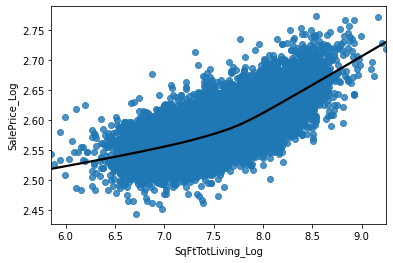

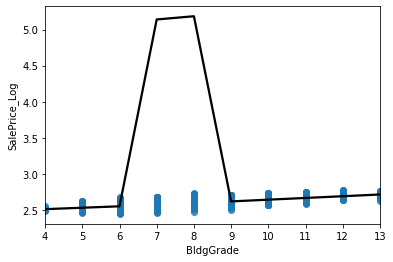

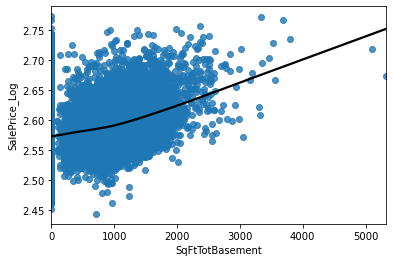

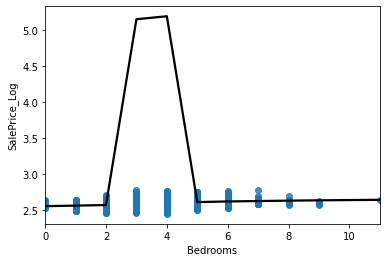

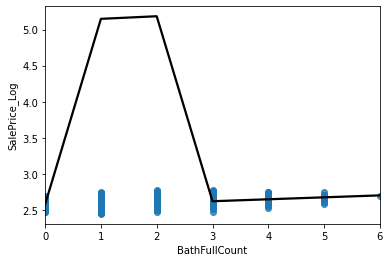

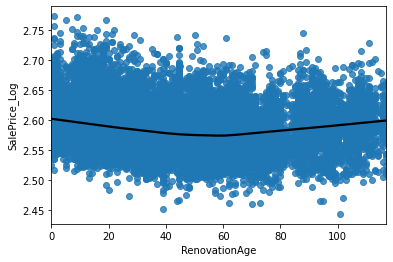

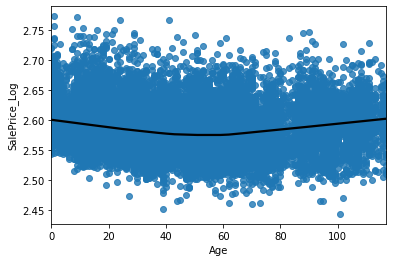

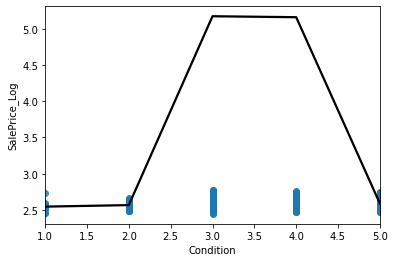

In [138]:
for col in plot_columns2:
    create_scatter_plots(col)
plt.close()

In [139]:
plot_columns3 = ['BldgGrade', 'Bedrooms', 'BathFullCount','Condition', 'TransactionYear']

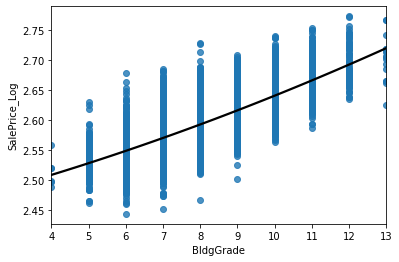

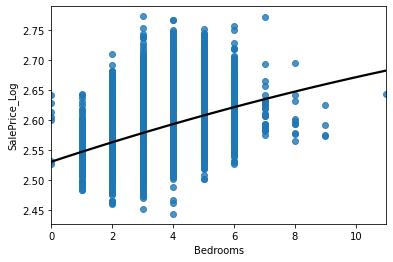

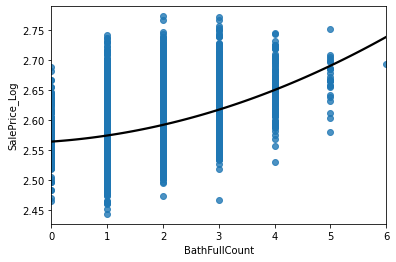

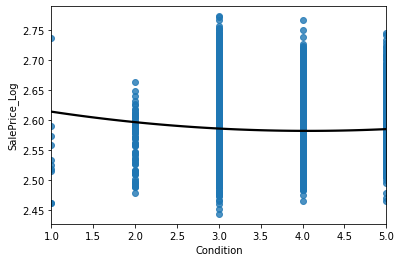

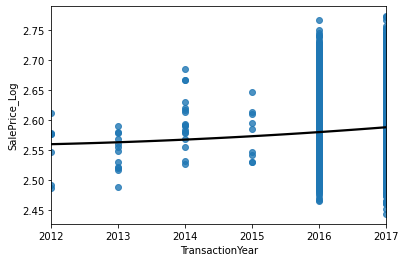

In [140]:
for col in plot_columns3:
    create_scatter_plots(col, lowess_arg=False, order_arg=2)

In [141]:
model_building['BldgGrade_Log'] = np.log(model_building.BldgGrade)
model_building['BldgGrade_square'] = model_building.BldgGrade*model_building.BldgGrade
create_scatter_plots('BldgGrade_Log', lowess_arg=False, order_arg=2)
create_scatter_plots('BldgGrade_square', lowess_arg=True, order_arg=1)
plt.close('all')

In [142]:
model_building.drop('BldgGrade_Log', axis=1, inplace=True)

C:\Users\bonne\Anaconda3\lib\site-packages\numpy\core\function_base.py:151: RuntimeWarning: invalid value encountered in multiply
  y *= step
C:\Users\bonne\Anaconda3\lib\site-packages\numpy\core\function_base.py:161: RuntimeWarning: invalid value encountered in add
  y += start
C:\Users\bonne\Anaconda3\lib\site-packages\numpy\lib\polynomial.py:659: RuntimeWarning: invalid value encountered in true_divide
  lhs /= scale


LinAlgError: SVD did not converge in Linear Least Squares

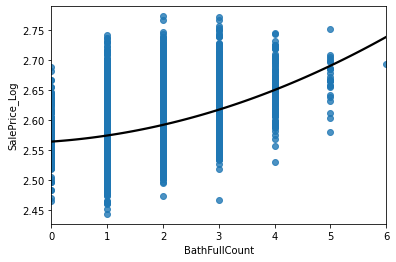

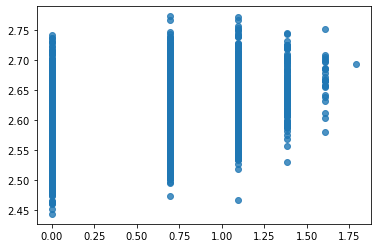

In [159]:
model_building['BathFullCount_Log'] = np.log(model_building.BathFullCount)
model_building['BathFullCount_square'] = model_building.BathFullCount*model_building.BathFullCount
model_building['BathFullCount_square_root'] = np.sqrt(model_building.BathFullCount)
create_scatter_plots('BathFullCount', lowess_arg=False, order_arg=2)
create_scatter_plots('BathFullCount_Log', lowess_arg=False, order_arg=2)
create_scatter_plots('BathFullCount_square', lowess_arg=False, order_arg=2)
create_scatter_plots('BathFullCount_square', lowess_arg=True, order_arg=1)
create_scatter_plots('BathFullCount_square_root', lowess_arg=False, order_arg=2)
create_scatter_plots('BathFullCount_square_root', lowess_arg=True, order_arg=1)
plt.close('all')


In [160]:
model_building.drop(['BathFullCount_Log', 'BathFullCount_square', 'BathFullCount_square_root'], axis=1, inplace=True)

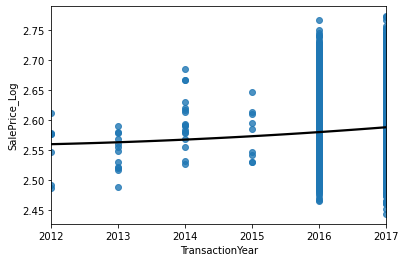

In [161]:
create_scatter_plots('TransactionYear', lowess_arg=False, order_arg=2)

In [162]:
# - RenovationAge
#Renovation age has a slight curve linear relation, with a potential positive relation when renovation age is high.  This is not what we would expect
#(holding all other factors constant), which then suggests that there is another variable contributing to this relation.  For example, it is possible that 
#this is explained by Age - older homes may be more desirable (see the graph for Age), e.g., because of historic value or they tend to be locate 
#in more desirable areas (or perhaps some tax benefit like in CA).  I will attempt both a curve linear relationship (square, I examined a number of transformations
#in scatter plots but they did not look good) and interacting this variable with Age.  I would normally dig 
#into this even more - I think this suggests an omitted variable and it might be age (but it could be something else).
model_building['RenovationAge_square'] = model_building.RenovationAge*model_building.RenovationAge
create_scatter_plots('RenovationAge_square')
plt.close()

In [163]:
model_building['Age_square'] = model_building.Age*model_building.Age
create_scatter_plots('Age_square')
plt.close()

In [327]:
model_building['SqFtTotBasement_Log'] = np.log(model_building.SqFtTotBasement)

<ipython-input-327-2e787d57f1aa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_building['SqFtTotBasement_Log'] = np.log(model_building.SqFtTotBasement)


In [328]:
model_building['SqFtTotBasement_square'] = model_building.SqFtTotBasement*model_building.SqFtTotBasement

<ipython-input-328-8e84618af146>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_building['SqFtTotBasement_square'] = model_building.SqFtTotBasement*model_building.SqFtTotBasement


In [329]:
model_building['SqFtTotBasement_square_root'] = np.sqrt(model_building.SqFtTotBasement)

<ipython-input-329-d48f00bbdd32>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_building['SqFtTotBasement_square_root'] = np.sqrt(model_building.SqFtTotBasement)


In [330]:
model_building['Condition_square_root'] = np.sqrt(model_building.Condition)

<ipython-input-330-e8b3172611f7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_building['Condition_square_root'] = np.sqrt(model_building.Condition)


In [331]:
model_building['Condition_Log'] = np.log(model_building.Condition)

<ipython-input-331-d57dda2ca9b0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_building['Condition_Log'] = np.log(model_building.Condition)


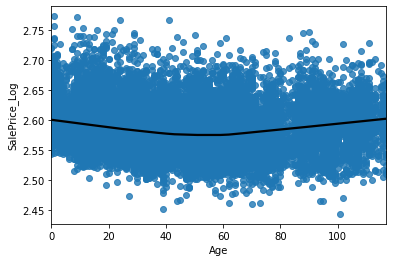

In [164]:
create_scatter_plots('Age', lowess_arg=True, order_arg=1)

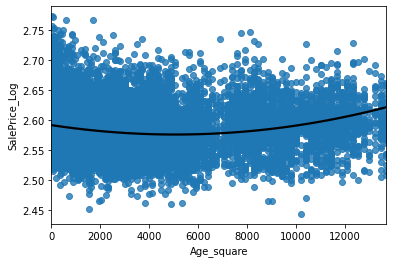

In [165]:
create_scatter_plots('Age_square', lowess_arg=False, order_arg=2)

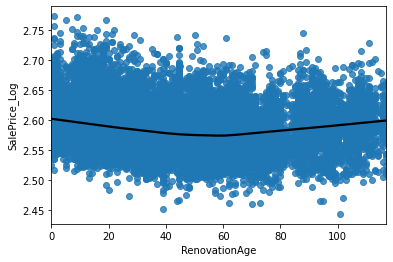

In [166]:
create_scatter_plots('RenovationAge', lowess_arg=True, order_arg=1)

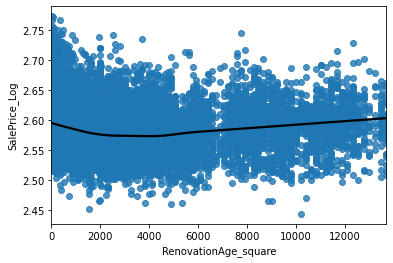

In [167]:
create_scatter_plots('RenovationAge_square', lowess_arg=True, order_arg=1)

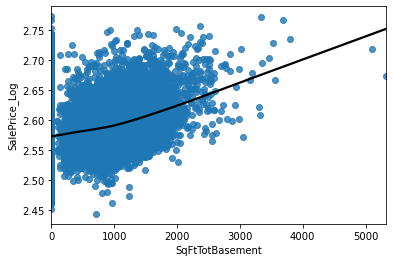

In [168]:
create_scatter_plots('SqFtTotBasement', lowess_arg=True, order_arg=1)

C:\Users\bonne\Anaconda3\lib\site-packages\numpy\core\function_base.py:151: RuntimeWarning: invalid value encountered in multiply
  y *= step
C:\Users\bonne\Anaconda3\lib\site-packages\numpy\core\function_base.py:161: RuntimeWarning: invalid value encountered in add
  y += start


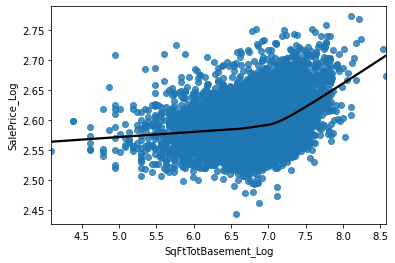

In [169]:
create_scatter_plots('SqFtTotBasement_Log', lowess_arg=True, order_arg=1)

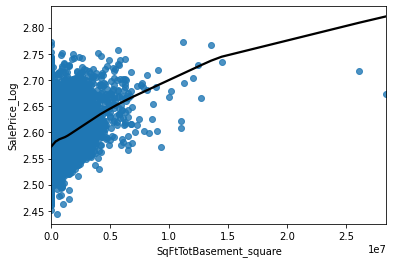

In [170]:
create_scatter_plots('SqFtTotBasement_square', lowess_arg=True, order_arg=1)

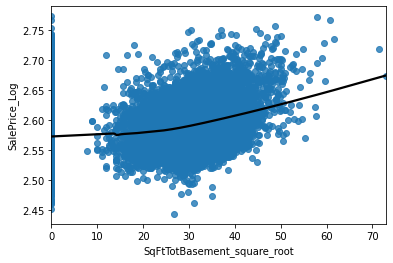

In [171]:
create_scatter_plots('SqFtTotBasement_square_root', lowess_arg=True, order_arg=1)

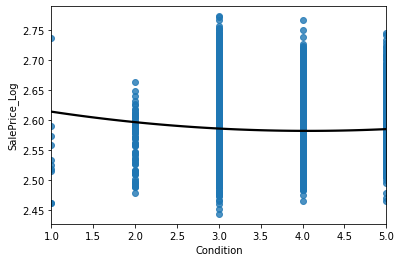

In [172]:
create_scatter_plots('Condition', lowess_arg=False, order_arg=2)

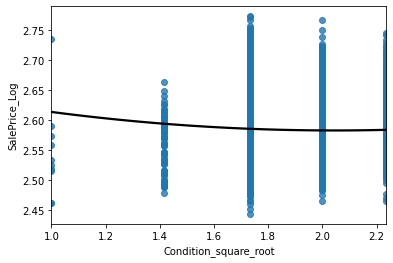

In [173]:
create_scatter_plots('Condition_square_root', lowess_arg=False, order_arg=2)

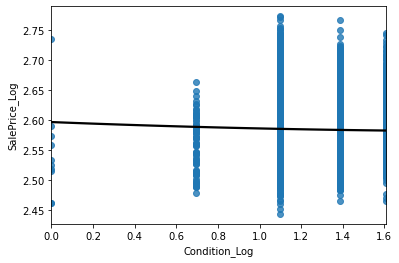

In [174]:
create_scatter_plots('Condition_Log', lowess_arg=False, order_arg=2)

In [180]:
# - SqFtTotBasement
#Since we will later model basement square foot using an interaction with HasBasement, the scatter plot
#below is only looking at houses that have basements (basement square foot = 0 may change the relation).
plt.figure()
sns.regplot(x=model_building.SqFtTotBasement[model_building.HasBasement==1], y=model_building.SalePrice_Log[model_building.HasBasement==1], data=model_building, lowess=True, ci=None, line_kws={'color':'black'},truncate=True)
plt.close()

In [181]:
#There appears to be some slightly curve linear relation, perhaps smaller basements are less often finished compared to larger basements and we
#therefore should not model finished and unfinished basements together. Let's look at finished and unfinished basements separately:

plt.figure()
sns.regplot(x=model_building.SqFtFinBasement[model_building.SqFtFinBasement!=0], y=model_building.SalePrice_Log[model_building.SqFtFinBasement!=0], data=model_building, lowess=True, ci=None, line_kws={'color':'black'},truncate=True)
model_building['SqFtUnfinBasement']=model_building.SqFtTotBasement-model_building.SqFtFinBasement
plt.figure()
sns.regplot(x=model_building.SqFtUnfinBasement[model_building.SqFtUnfinBasement!=0], y=model_building.SalePrice_Log[model_building.SqFtUnfinBasement!=0], data=model_building, lowess=True, ci=None, line_kws={'color':'black'},truncate=True)
plt.close('all')

In [182]:
#First of all, note that the finished basement slope is slightly steeper (from 13.3 to just above 16 compared to from 13.2 to 15.5).
#It thus might make sense to model these two lines differently. Second, while these two are slightly more linear, 
#there is still a flat area initially. I am not clear on why this is and
#at this point I would normally talk to a domain expert to understand if there might be another variable
#that can explain this relation.  In this case, we are not going to dig that deep and instead just assume 
#that this is the actual relation and there is no other explanation for it.  Given that the relation is almost
#linear, I will simply include SqFtFinBasement (and unfinished) as a regular variable (we could alternatively have modeled a second
#order variable, e.g., B1*SqFtFinBasement + B2*SqFtFinBasement^2 or included an interaction with a dummy variable
#variable indicating SqFtFinBasement<600 (or so)). I will also try the dummy variable approach.

model_building['HasFinishedBasement'] = np.where(model_building.SqFtFinBasement==0,0,1)
model_building['HasUnfinBasement'] = np.where(model_building.SqFtUnfinBasement<=0,0,1)
model_building['SmallFinishedBasement'] = np.where(model_building.SqFtFinBasement<=600,1,0)
model_building['SmallUnFinishedBasement'] = np.where(model_building.SqFtUnfinBasement<=500,1,0)

In [183]:
model_building

,Major,DocumentDate,Minor,DirectionPrefix,ZipCode,Stories,BldgGrade,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,...,SqFtTotBasement_Log,SqFtTotBasement_square,SqFtTotBasement_square_root,Condition_square_root,Condition_Log,SqFtUnfinBasement,HasFinishedBasement,HasUnfinBasement,SmallFinishedBasement,SmallUnFinishedBasement
21696,502860,2017-12-29,10,SW,98023,1.0,7,1580,0,0,...,-inf,0,0.000000,1.732051,1.098612,0,0,0,1,1
21697,769545,2017-12-29,90,S,98198,1.5,10,1820,1460,0,...,7.489971,3204100,42.308392,1.732051,1.098612,480,1,1,0,1
21698,757562,2017-12-29,630,,98003,1.0,8,1980,0,0,...,6.492240,435600,25.690465,1.732051,1.098612,400,1,1,1,1
21699,382220,2017-12-29,122,,98125,1.0,5,700,0,0,...,-inf,0,0.000000,1.732051,1.098612,0,0,0,1,1
21700,232981,2017-12-29,530,SE,98042,2.0,7,970,0,720,...,-inf,0,0.000000,1.732051,1.098612,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42547,689100,2012-08-01,40,NE,98052,2.0,10,1510,0,1560,...,-inf,0,0.000000,1.732051,1.098612,0,0,0,1,1
42548,34500,2012-07-20,485,,98122,1.0,7,1180,0,0,...,7.073270,1392400,34.351128,1.732051,1.098612,580,1,1,1,0
42549,197370,2012-07-17,190,NE,98034,2.0,8,1970,0,620,...,-inf,0,0.000000,1.732051,1.098612,0,0,0,1,1
42550,152204,2012-03-29,9036,S,98198,1.0,6,1220,0,0,...,-inf,0,0.000000,1.732051,1.098612,0,0,0,1,1


In [184]:
#SqFtTotLiving_Log + BldgGrade_square + SqFtTotBasement_square_root + Bedrooms + BathFullCount + Condition + RenovationAge_square + Age_square

In [194]:
(model_building == 0).sum(axis=0)

Major                              0
DocumentDate                       0
Minor                              0
DirectionPrefix                    0
ZipCode                            0
Stories                            0
BldgGrade                          0
SqFt1stFloor                       0
SqFtHalfFloor                  18893
SqFt2ndFloor                   12948
SqFtUpperFloor                 20665
SqFtUnfinFull                  20825
SqFtUnfinHalf                  20820
SqFtTotLiving                      0
SqFtTotBasement                10714
SqFtFinBasement                12228
FinBasementGrade               12228
SqFtGarageBasement             16330
SqFtGarageAttached              9443
DaylightBasement                   0
SqFtOpenPorch                  10984
SqFtEnclosedPorch              19986
SqFtDeck                       10834
BrickStone                     19491
Bedrooms                           7
BathHalfCount                  11251
Bath3qtrCount                  11788
B

### Part 3 Model Building

In [225]:
model_results = sm.ols(formula= 'SalePrice_Log ~ ZipCode + Stories + SqFt1stFloor + SqFt2ndFloor + SqFtUpperFloor + SqFtFinBasement + SqFtTotBasement:HasBasement + FinBasementGrade + SqFtGarageBasement:HasGarageBasement + SqFtGarageAttached:HasGarage + SqFtOpenPorch + SqFtEnclosedPorch + SqFtDeck + BrickStone + Bedrooms + BathHalfCount + Bath3qtrCount + BathFullCount + FpSingleStory:HasFpSingleStory + FpFreestanding + FpAdditional + Condition + AddnlCost + TransactionYear + SqFtTotLiving_Log + BldgGrade_square + Age_square', data=model_building).fit()

### P-values > 0.1 indicating variable is insignificant

###  1) SqFtUnfinFull - 0.84

###  2) Minor - 0.73

###  3) RenovationAge_squared - 0.70

###  4) SqFtHalfFloor - 0.51

###  5) SqFtUnFinHalf - 0.38

###  6) Major - 0.31

In [226]:
model_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          SalePrice_Log   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     1374.
Date:                Tue, 28 Sep 2021   Prob (F-statistic):               0.00
Time:                        20:11:40   Log-Likelihood:                 48952.
No. Observations:               20856   AIC:                        -9.785e+04
Df Residuals:                   20828   BIC:                        -9.762e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                              -15.6435      0.711    -21.996      0.000     -17.037     -14.249
ZipCode                               3.051e-05   3.35e-06      9.102      0.000    2.39e-05    3.71e-05
Stories                                  0.0035      0.001      4.369      0.000       0.002       0.005
SqFt1stFloor                          1.402e-06   8.09e-07      1.734      0.083   -1.83e-07    2.99e-06
SqFt2ndFloor                          2.752e-06   6.71e-07      4.100      0.000    1.44e-06    4.07e-06
SqFtUpperFloor                        1.352e-05   3.06e-06      4.417      0.000    7.52e-06    1.95e-05
SqFtFinBasement                      -1.068e-05    1.1e-06     -9.687      0.000   -1.28e-05   -8.52e-06
SqFtTotBasement:HasBasement           1.088e-05   8.01e-07     13.596      0.000    9.32e-06    1.25e-05
FinBasementGrade                         0.0006      0.000      6.105      0.000       0.000       0.001
SqFtGarageBasement:HasGarageBasement -1.541e-05   1.39e-06    -11.065      0.000   -1.81e-05   -1.27e-05
SqFtGarageAttached:HasGarage         -1.221e-05   8.99e-07    -13.581      0.000    -1.4e-05   -1.04e-05
SqFtOpenPorch                         8.555e-06   1.65e-06      5.173      0.000    5.31e-06    1.18e-05
SqFtEnclosedPorch                    -2.187e-05      5e-06     -4.379      0.000   -3.17e-05   -1.21e-05
SqFtDeck                              7.496e-06   8.02e-07      9.349      0.000    5.92e-06    9.07e-06
BrickStone                            3.776e-05   9.46e-06      3.990      0.000    1.92e-05    5.63e-05
Bedrooms                                -0.0030      0.000    -11.888      0.000      -0.004      -0.003
BathHalfCount                            0.0019      0.000      4.775      0.000       0.001       0.003
Bath3qtrCount                            0.0057      0.000     15.306      0.000       0.005       0.006
BathFullCount                            0.0047      0.000     11.643      0.000       0.004       0.005
FpSingleStory:HasFpSingleStory           0.0020      0.000      6.564      0.000       0.001       0.003
FpFreestanding                          -0.0026      0.001     -4.188      0.000      -0.004      -0.001
FpAdditional                             0.0029      0.001      5.693      0.000       0.002       0.004
Condition                                0.0031      0.000     12.693      0.000       0.003       0.004
AddnlCost                            -2.617e-07   6.06e-08     -4.319      0.000   -3.81e-07   -1.43e-07
TransactionYear                          0.0074      0.000     23.811      0.000       0.007       0.008
SqFtTotLiving_Log                        0.0236      0.001     17.634      0.000       0.021       0.026
BldgGrade_square                      

<Figure size 432x288 with 0 Axes>

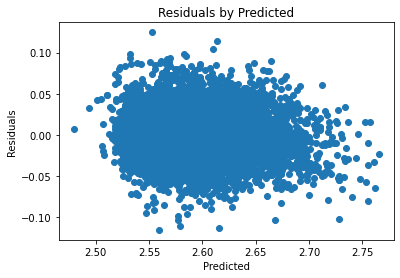

<Figure size 432x288 with 0 Axes>

In [231]:
model_building["residuals"] = model_results.resid
model_building["predicted"] = model_results.fittedvalues
plt.scatter(model_building.predicted, model_building.residuals)
plt.title("Residuals by Predicted")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.figure()

In [227]:
model_building["CooksD"] = model_results.get_influence().summary_frame().filter(["cooks_d"])

In [232]:
model_building = model_building[(model_building.CooksD < (4/model_building.residuals.count()))]

In [233]:
from patsy import dmatrices
import statsmodels.api as sm_non_formula

In [234]:
y,X = dmatrices('SalePrice_Log ~ ZipCode + Stories + SqFt1stFloor + SqFt2ndFloor + SqFtUpperFloor + SqFtFinBasement + SqFtTotBasement:HasBasement + FinBasementGrade + SqFtGarageBasement:HasGarageBasement + SqFtGarageAttached:HasGarage + SqFtOpenPorch + SqFtEnclosedPorch + SqFtDeck + BrickStone + Bedrooms + BathHalfCount + Bath3qtrCount + BathFullCount + FpSingleStory:HasFpSingleStory + FpFreestanding + FpAdditional + Condition + AddnlCost + TransactionYear + SqFtTotLiving_Log + BldgGrade_square + Age_square', data=model_building, return_type='dataframe')

In [235]:
robust_results = sm_non_formula.RLM(y, X, M=sm_non_formula.robust.norms.HuberT()).fit()

In [237]:
robust_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:          SalePrice_Log   No. Observations:                19727
Model:                            RLM   Df Residuals:                    19699
Method:                          IRLS   Df Model:                           27
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Tue, 28 Sep 2021                                         
Time:                        20:40:40                                         
No. Iterations:                    50                                         
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                              -17.1791      0.677    -25.357      0.000     -18.507     -15.851
ZipCode                               3.788e-05   3.24e-06     11.708      0.000    3.15e-05    4.42e-05
Stories                                  0.0052      0.001      6.515      0.000       0.004       0.007
SqFt1stFloor                          2.117e-06   8.59e-07      2.464      0.014    4.33e-07     3.8e-06
SqFt2ndFloor                          3.048e-06   6.82e-07      4.467      0.000    1.71e-06    4.39e-06
SqFtUpperFloor                        1.525e-05   3.44e-06      4.438      0.000    8.51e-06     2.2e-05
SqFtFinBasement                      -1.161e-05   1.12e-06    -10.377      0.000   -1.38e-05   -9.41e-06
SqFtTotBasement:HasBasement           1.315e-05   7.99e-07     16.465      0.000    1.16e-05    1.47e-05
FinBasementGrade                         0.0007      0.000      6.890      0.000       0.001       0.001
SqFtGarageBasement:HasGarageBasement -1.599e-05   1.37e-06    -11.694      0.000   -1.87e-05   -1.33e-05
SqFtGarageAttached:HasGarage         -1.221e-05   8.75e-07    -13.954      0.000   -1.39e-05   -1.05e-05
SqFtOpenPorch                             1e-05   1.69e-06      5.933      0.000     6.7e-06    1.33e-05
SqFtEnclosedPorch                    -2.461e-05   5.44e-06     -4.520      0.000   -3.53e-05   -1.39e-05
SqFtDeck                              7.164e-06    7.9e-07      9.063      0.000    5.61e-06    8.71e-06
BrickStone                            3.383e-05   9.25e-06      3.656      0.000    1.57e-05     5.2e-05
Bedrooms                                -0.0028      0.000    -11.532      0.000      -0.003      -0.002
BathHalfCount                            0.0017      0.000      4.415      0.000       0.001       0.002
Bath3qtrCount                            0.0055      0.000     15.080      0.000       0.005       0.006
BathFullCount                            0.0046      0.000     11.797      0.000       0.004       0.005
FpSingleStory:HasFpSingleStory           0.0020      0.000      6.556      0.000       0.001       0.003
FpFreestanding                          -0.0027      0.001     -4.612      0.000      -0.004      -0.002
FpAdditional                             0.0020      0.000      3.982      0.000       0.001       0.003
Condition                                0.0033      0.000     14.415      0.000       0.003       0.004
AddnlCost                            -4.121e-07   6.54e-08     -6.301      0.000    -5.4e-07   -2.84e-07
TransactionYear                          0.0078      0.000     26.459      0.000       0.007       0.008
SqFtTotLiving_Log                        0.0221      0.001     15.957      0.000       0.019       0.025
BldgGrade_square                      

In [238]:
robust_results1 = model_results.get_robustcov_results(cov_type='HC3', use_t=None)
robust_results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          SalePrice_Log   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     1174.
Date:                Tue, 28 Sep 2021   Prob (F-statistic):               0.00
Time:                        20:48:28   Log-Likelihood:                 48952.
No. Observations:               20856   AIC:                        -9.785e+04
Df Residuals:                   20828   BIC:                        -9.762e+04
Df Model:                          27                                         
Covariance Type:                  HC3                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                              -15.6435      0.722    -21.653      0.000     -17.060     -14.227
ZipCode                               3.051e-05   3.76e-06      8.114      0.000    2.31e-05    3.79e-05
Stories                                  0.0035      0.001      4.184      0.000       0.002       0.005
SqFt1stFloor                          1.402e-06   9.49e-07      1.477      0.140   -4.58e-07    3.26e-06
SqFt2ndFloor                          2.752e-06   7.66e-07      3.594      0.000    1.25e-06    4.25e-06
SqFtUpperFloor                        1.352e-05   3.15e-06      4.285      0.000    7.34e-06    1.97e-05
SqFtFinBasement                      -1.068e-05   1.24e-06     -8.619      0.000   -1.31e-05   -8.25e-06
SqFtTotBasement:HasBasement           1.088e-05   8.75e-07     12.445      0.000    9.17e-06    1.26e-05
FinBasementGrade                         0.0006      0.000      5.854      0.000       0.000       0.001
SqFtGarageBasement:HasGarageBasement -1.541e-05   1.48e-06    -10.389      0.000   -1.83e-05   -1.25e-05
SqFtGarageAttached:HasGarage         -1.221e-05   9.49e-07    -12.862      0.000   -1.41e-05   -1.03e-05
SqFtOpenPorch                         8.555e-06   1.84e-06      4.638      0.000    4.94e-06    1.22e-05
SqFtEnclosedPorch                    -2.187e-05   5.51e-06     -3.968      0.000   -3.27e-05   -1.11e-05
SqFtDeck                              7.496e-06   8.65e-07      8.669      0.000     5.8e-06    9.19e-06
BrickStone                            3.776e-05   9.47e-06      3.985      0.000    1.92e-05    5.63e-05
Bedrooms                                -0.0030      0.000    -10.988      0.000      -0.004      -0.002
BathHalfCount                            0.0019      0.000      4.527      0.000       0.001       0.003
Bath3qtrCount                            0.0057      0.000     13.039      0.000       0.005       0.007
BathFullCount                            0.0047      0.000     10.512      0.000       0.004       0.006
FpSingleStory:HasFpSingleStory           0.0020      0.000      6.233      0.000       0.001       0.003
FpFreestanding                          -0.0026      0.001     -4.157      0.000      -0.004      -0.001
FpAdditional                             0.0029      0.001      5.128      0.000       0.002       0.004
Condition                                0.0031      0.000     12.104      0.000       0.003       0.004
AddnlCost                            -2.617e-07   7.19e-08     -3.640      0.000   -4.03e-07   -1.21e-07
TransactionYear                          0.0074      0.000     24.085      0.000       0.007       0.008
SqFtTotLiving_Log                        0.0236      0.002     15.373      0.000       0.021       0.027
BldgGrade_square                      

In [253]:
def create_box_and_dist_plots(col):
#    plt.figure()
#    sns.boxplot(x=col[pd.notnull(col)]) #only plot not null values (error if NaN values are plotted)
    plt.figure()    
    sns.distplot(col[pd.notnull(col)], kde=False, fit=stats.norm) 

In [254]:
#I then picked a few variables that I think might be important in predicting sales prices and created 
#a list containing the names of this variables (and SalePrice). I then plot them by looping through the 
#list, each time calling the create_box_and_dist_plots function
plot_columns = ['SalePrice','SqFtTotLiving','BldgGrade', 'SqFtTotBasement', 'Bedrooms', 'BathFullCount', 'Condition','RenovationAge', 'Age', 'PricePerSqFoot', 'Average_PricePerSqFoot']

C:\Users\bonne\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\bonne\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\bonne\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

KeyError: 'PricePerSqFoot'

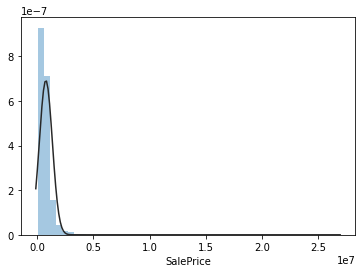

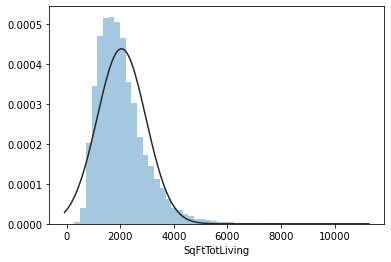

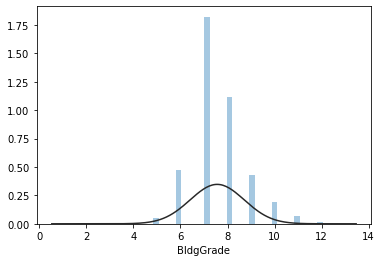

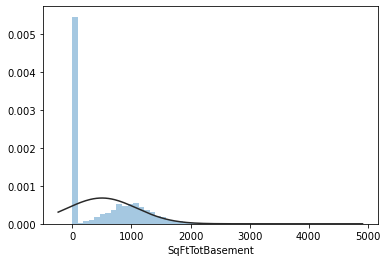

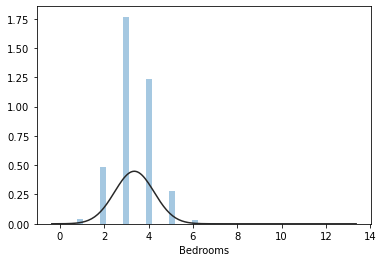

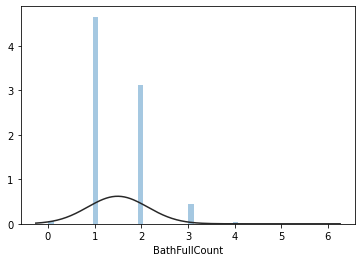

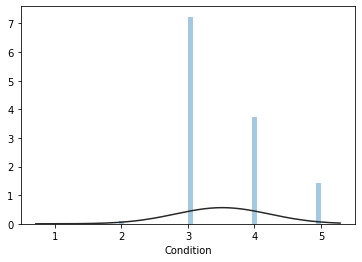

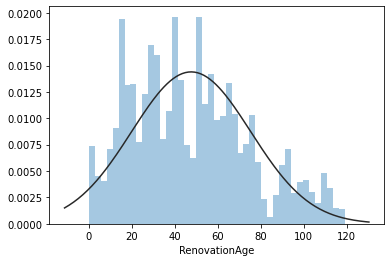

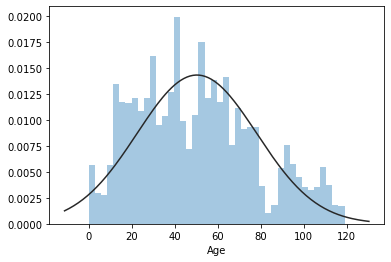

In [255]:
for col in plot_columns:
    create_box_and_dist_plots(hold_out[col])

plt.close('all')  # After drawing the figures close them to release it from memory

In [ ]:
## Observations ##
# - SalePrice appears slightly skewed, but it is a little difficult to see the data because of outliers.  Let's looks at the distribution 
#of a subsample that excludes the outlier:
argument_1 = hold_out.SalePrice[hold_out.SalePrice<2500000]
create_box_and_dist_plots(argument_1)
plt.close()

In [ ]:
#This more clearly show that SalePrice is skewed and could potentially benefit from a transformation:
hold_out['SalePrice_Log'] = np.log(hold_out.SalePrice)

In [ ]:
#Let's look at the distrubtion after the transformation
create_box_and_dist_plots(hold_out.SalePrice_Log)
create_box_and_dist_plots(hold_out.SalePrice_Log[hold_out.SalePrice<2500000])
plt.close('all')

In [ ]:
create_box_and_dist_plots(hold_out.SqFtTotLiving[hold_out.SqFtTotLiving<6500])
hold_out['SqFtTotLiving_Log'] = np.log(hold_out.SqFtTotLiving)
create_box_and_dist_plots(hold_out.SqFtTotLiving_Log[hold_out.SqFtTotLiving<6500])
plt.close('all')

In [256]:
hold_out['HasBasement'] = np.where(hold_out.SqFtTotBasement==0,0,1)
hold_out['HasFpSingleStory'] = np.where(hold_out.FpSingleStory == 0,0,1)
hold_out['HasFpMultiStory'] = np.where(hold_out.FpSingleStory == 0,0,1)
hold_out['HasGarage'] = np.where(hold_out.SqFtGarageAttached == 0,0,1)
hold_out['HasGarageBasement'] = np.where(hold_out.SqFtGarageBasement == 0,0,1)

<ipython-input-256-f9336e495707>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hold_out['HasBasement'] = np.where(hold_out.SqFtTotBasement==0,0,1)
<ipython-input-256-f9336e495707>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hold_out['HasFpSingleStory'] = np.where(hold_out.FpSingleStory == 0,0,1)
<ipython-input-256-f9336e495707>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

In [257]:
create_box_and_dist_plots(hold_out.SqFtTotBasement[hold_out.HasBasement==1])
plt.close()

C:\Users\bonne\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


In [258]:
create_box_and_dist_plots(hold_out.Condition)
plt.close()

C:\Users\bonne\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


In [259]:
def create_scatter_plots(col, lowess_arg = True, order_arg=1):
    plt.figure()
    sns.regplot(x=col, y='SalePrice_Log', data=hold_out, lowess=lowess_arg, order=order_arg, ci=None, truncate=True, line_kws={'color':'black'})
    

In [260]:
plot_columns2 = ['SqFtTotLiving_Log','BldgGrade', 'SqFtTotBasement', 'Bedrooms', 'BathFullCount','RenovationAge', 'Age', 'Condition', 'TransactionYear']

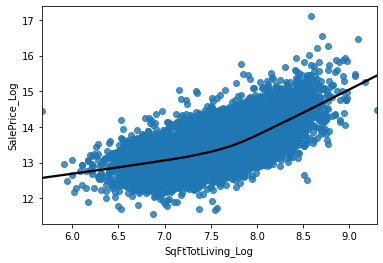

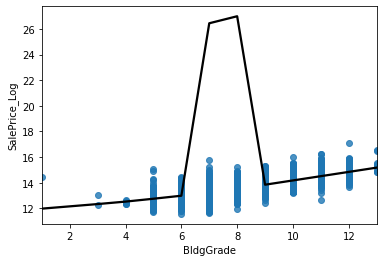

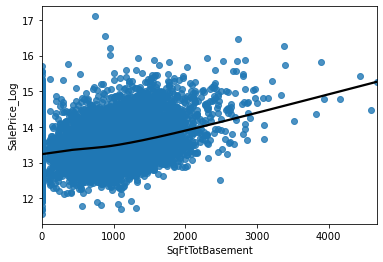

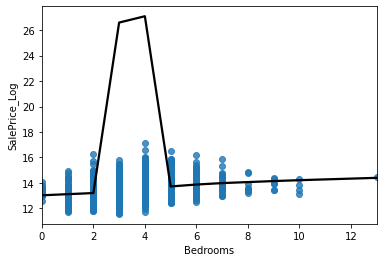

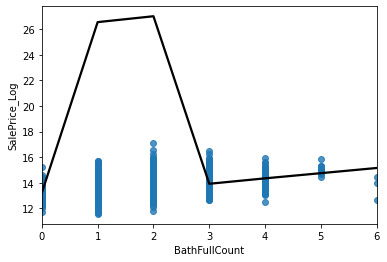

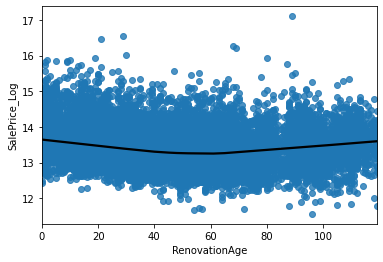

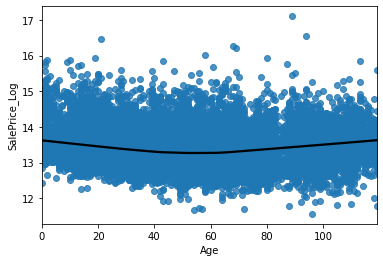

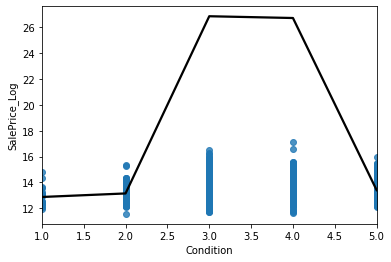

In [261]:
for col in plot_columns2:
    create_scatter_plots(col)
plt.close()

In [262]:
plot_columns3 = ['BldgGrade', 'Bedrooms', 'BathFullCount','Condition', 'TransactionYear']

C:\Users\bonne\Anaconda3\lib\site-packages\seaborn\regression.py:256: RankWarning: Polyfit may be poorly conditioned
  yhat = reg_func(x, y)


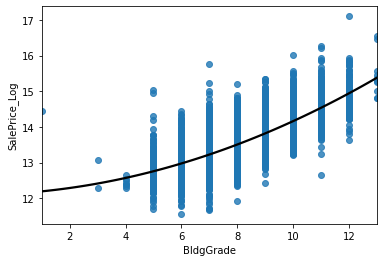

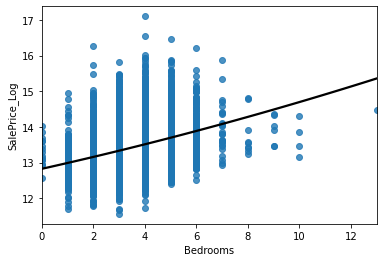

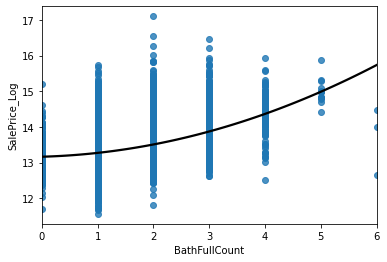

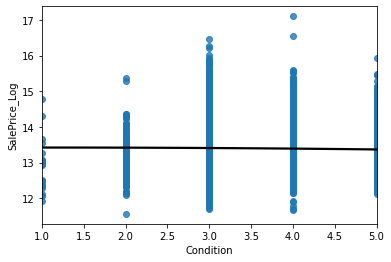

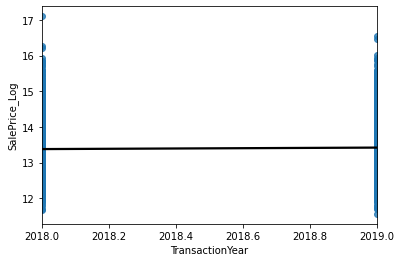

In [263]:
for col in plot_columns3:
    create_scatter_plots(col, lowess_arg=False, order_arg=2)

In [264]:
hold_out['BldgGrade_Log'] = np.log(hold_out.BldgGrade)
hold_out['BldgGrade_square'] = hold_out.BldgGrade*hold_out.BldgGrade
create_scatter_plots('BldgGrade_Log', lowess_arg=False, order_arg=2)
create_scatter_plots('BldgGrade_square', lowess_arg=True, order_arg=1)
plt.close('all')

<ipython-input-264-b9a7533362eb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hold_out['BldgGrade_Log'] = np.log(hold_out.BldgGrade)
<ipython-input-264-b9a7533362eb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hold_out['BldgGrade_square'] = hold_out.BldgGrade*hold_out.BldgGrade


In [265]:
hold_out.drop('BldgGrade_Log', axis=1, inplace=True)

C:\Users\bonne\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


C:\Users\bonne\Anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-267-6d59bc457932>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hold_out['BathFullCount_Log'] = np.log(hold_out.BathFullCount)
<ipython-input-267-6d59bc457932>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hold_out['BathFullCount_square'] = hold_out.BathFullCount*hold_out.BathFullCount
<ipython-input-267-6d59bc457

LinAlgError: SVD did not converge in Linear Least Squares

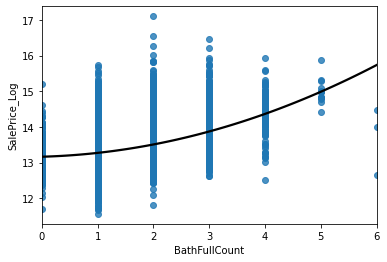

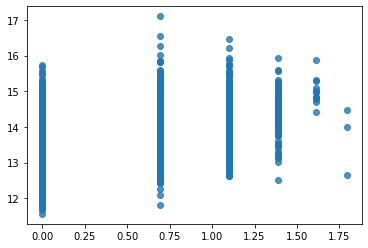

In [267]:
hold_out['BathFullCount_Log'] = np.log(hold_out.BathFullCount)
hold_out['BathFullCount_square'] = hold_out.BathFullCount*hold_out.BathFullCount
hold_out['BathFullCount_square_root'] = np.sqrt(hold_out.BathFullCount)
create_scatter_plots('BathFullCount', lowess_arg=False, order_arg=2)
create_scatter_plots('BathFullCount_Log', lowess_arg=False, order_arg=2)
create_scatter_plots('BathFullCount_square', lowess_arg=False, order_arg=2)
create_scatter_plots('BathFullCount_square', lowess_arg=True, order_arg=1)
create_scatter_plots('BathFullCount_square_root', lowess_arg=False, order_arg=2)
create_scatter_plots('BathFullCount_square_root', lowess_arg=True, order_arg=1)
plt.close('all')

In [268]:
hold_out.drop(['BathFullCount_Log', 'BathFullCount_square', 'BathFullCount_square_root'], axis=1, inplace=True)

C:\Users\bonne\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


C:\Users\bonne\Anaconda3\lib\site-packages\seaborn\regression.py:256: RankWarning: Polyfit may be poorly conditioned
  yhat = reg_func(x, y)


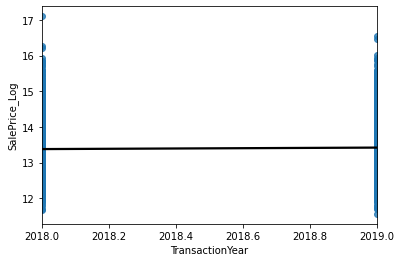

In [269]:
create_scatter_plots('TransactionYear', lowess_arg=False, order_arg=2)

In [270]:
# - RenovationAge
#Renovation age has a slight curve linear relation, with a potential positive relation when renovation age is high.  This is not what we would expect
#(holding all other factors constant), which then suggests that there is another variable contributing to this relation.  For example, it is possible that 
#this is explained by Age - older homes may be more desirable (see the graph for Age), e.g., because of historic value or they tend to be locate 
#in more desirable areas (or perhaps some tax benefit like in CA).  I will attempt both a curve linear relationship (square, I examined a number of transformations
#in scatter plots but they did not look good) and interacting this variable with Age.  I would normally dig 
#into this even more - I think this suggests an omitted variable and it might be age (but it could be something else).
hold_out['RenovationAge_square'] = hold_out.RenovationAge*hold_out.RenovationAge
create_scatter_plots('RenovationAge_square')
plt.close()

<ipython-input-270-322e53631bb4>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hold_out['RenovationAge_square'] = hold_out.RenovationAge*hold_out.RenovationAge


In [271]:
hold_out['Age_square'] = hold_out.Age*hold_out.Age
create_scatter_plots('Age_square')
plt.close()

<ipython-input-271-3c1e78ecd17c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hold_out['Age_square'] = hold_out.Age*hold_out.Age


In [323]:
hold_out['SqFtTotBasement_Log'] = np.log(hold_out.SqFtTotBasement)

C:\Users\bonne\Anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-323-5c4251bd8320>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hold_out['SqFtTotBasement_Log'] = np.log(hold_out.SqFtTotBasement)


In [322]:
hold_out['SqFtTotBasement_square'] = hold_out.SqFtTotBasement*hold_out.SqFtTotBasement

<ipython-input-322-c36ea81c0a55>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hold_out['SqFtTotBasement_square'] = hold_out.SqFtTotBasement*hold_out.SqFtTotBasement


In [324]:
hold_out['SqFtTotBasement_square_root'] = np.sqrt(hold_out.SqFtTotBasement)

<ipython-input-324-55c5d441170e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hold_out['SqFtTotBasement_square_root'] = np.sqrt(hold_out.SqFtTotBasement)


In [325]:
hold_out['Condition_square_root'] = np.sqrt(hold_out.Condition)

<ipython-input-325-5042b69ad088>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hold_out['Condition_square_root'] = np.sqrt(hold_out.Condition)


In [326]:
hold_out['Condition_Log'] = np.log(hold_out.Condition)

<ipython-input-326-e0c000baf39e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hold_out['Condition_Log'] = np.log(hold_out.Condition)


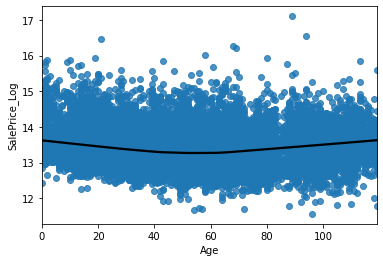

In [272]:
create_scatter_plots('Age', lowess_arg=True, order_arg=1)

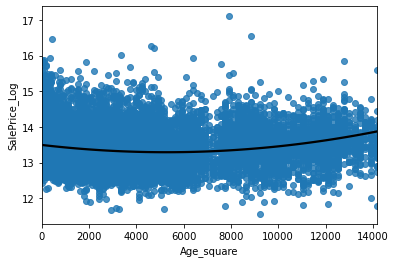

In [273]:
create_scatter_plots('Age_square', lowess_arg=False, order_arg=2)

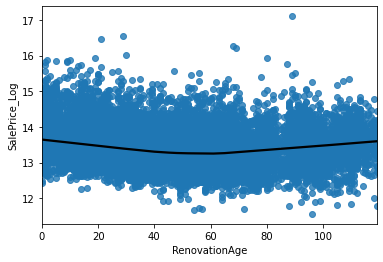

In [274]:
create_scatter_plots('RenovationAge', lowess_arg=True, order_arg=1)

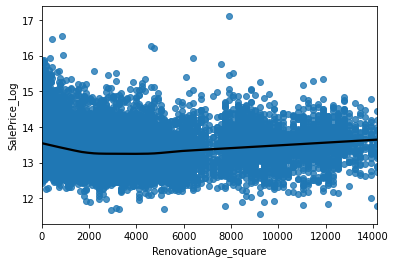

In [275]:
create_scatter_plots('RenovationAge_square', lowess_arg=True, order_arg=1)

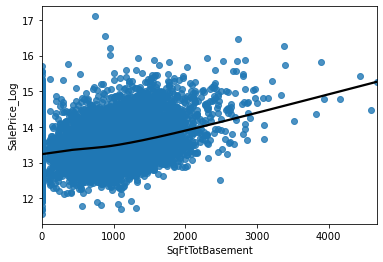

In [276]:
create_scatter_plots('SqFtTotBasement', lowess_arg=True, order_arg=1)

C:\Users\bonne\Anaconda3\lib\site-packages\numpy\core\function_base.py:151: RuntimeWarning: invalid value encountered in multiply
  y *= step
C:\Users\bonne\Anaconda3\lib\site-packages\numpy\core\function_base.py:161: RuntimeWarning: invalid value encountered in add
  y += start


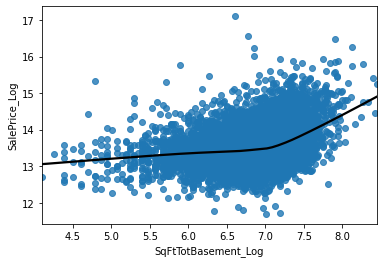

In [306]:
create_scatter_plots('SqFtTotBasement_Log', lowess_arg=True, order_arg=1)

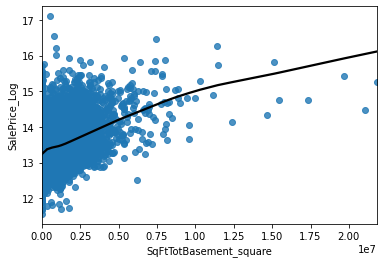

In [307]:
create_scatter_plots('SqFtTotBasement_square', lowess_arg=True, order_arg=1)

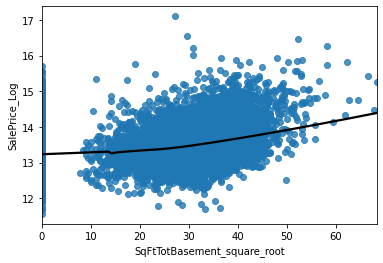

In [308]:
create_scatter_plots('SqFtTotBasement_square_root', lowess_arg=True, order_arg=1)

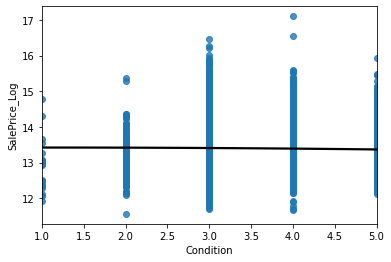

In [280]:
create_scatter_plots('Condition', lowess_arg=False, order_arg=2)

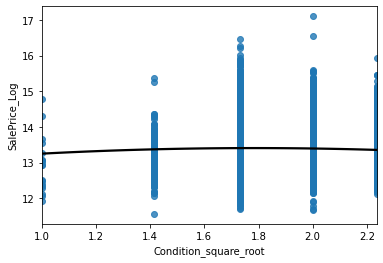

In [301]:
create_scatter_plots('Condition_square_root', lowess_arg=False, order_arg=2)

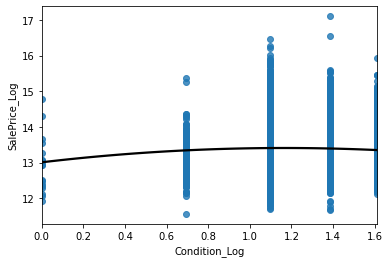

In [302]:
create_scatter_plots('Condition_Log', lowess_arg=False, order_arg=2)

In [292]:
# - SqFtTotBasement
#Since we will later model basement square foot using an interaction with HasBasement, the scatter plot
#below is only looking at houses that have basements (basement square foot = 0 may change the relation).
plt.figure()
sns.regplot(x=hold_out.SqFtTotBasement[hold_out.HasBasement==1], y=hold_out.SalePrice_Log[hold_out.HasBasement==1], data=hold_out, lowess=True, ci=None, line_kws={'color':'black'},truncate=True)
plt.close()

In [293]:
#There appears to be some slightly curve linear relation, perhaps smaller basements are less often finished compared to larger basements and we
#therefore should not model finished and unfinished basements together. Let's look at finished and unfinished basements separately:

plt.figure()
sns.regplot(x=hold_out.SqFtFinBasement[hold_out.SqFtFinBasement!=0], y=hold_out.SalePrice_Log[hold_out.SqFtFinBasement!=0], data=hold_out, lowess=True, ci=None, line_kws={'color':'black'},truncate=True)
hold_out['SqFtUnfinBasement']=hold_out.SqFtTotBasement-hold_out.SqFtFinBasement
plt.figure()
sns.regplot(x=hold_out.SqFtUnfinBasement[hold_out.SqFtUnfinBasement!=0], y=hold_out.SalePrice_Log[hold_out.SqFtUnfinBasement!=0], data=hold_out, lowess=True, ci=None, line_kws={'color':'black'},truncate=True)
plt.close('all')

<ipython-input-293-a724a1f93aca>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hold_out['SqFtUnfinBasement']=hold_out.SqFtTotBasement-hold_out.SqFtFinBasement


In [294]:
#First of all, note that the finished basement slope is slightly steeper (from 13.3 to just above 16 compared to from 13.2 to 15.5).
#It thus might make sense to model these two lines differently. Second, while these two are slightly more linear, 
#there is still a flat area initially. I am not clear on why this is and
#at this point I would normally talk to a domain expert to understand if there might be another variable
#that can explain this relation.  In this case, we are not going to dig that deep and instead just assume 
#that this is the actual relation and there is no other explanation for it.  Given that the relation is almost
#linear, I will simply include SqFtFinBasement (and unfinished) as a regular variable (we could alternatively have modeled a second
#order variable, e.g., B1*SqFtFinBasement + B2*SqFtFinBasement^2 or included an interaction with a dummy variable
#variable indicating SqFtFinBasement<600 (or so)). I will also try the dummy variable approach.

hold_out['HasFinishedBasement'] = np.where(hold_out.SqFtFinBasement==0,0,1)
hold_out['HasUnfinBasement'] = np.where(hold_out.SqFtUnfinBasement<=0,0,1)
hold_out['SmallFinishedBasement'] = np.where(hold_out.SqFtFinBasement<=600,1,0)
hold_out['SmallUnFinishedBasement'] = np.where(hold_out.SqFtUnfinBasement<=500,1,0)

<ipython-input-294-1d95e6559044>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hold_out['HasFinishedBasement'] = np.where(hold_out.SqFtFinBasement==0,0,1)
<ipython-input-294-1d95e6559044>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hold_out['HasUnfinBasement'] = np.where(hold_out.SqFtUnfinBasement<=0,0,1)
<ipython-input-294-1d95e6559044>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

In [295]:
hold_out

,Major,DocumentDate,Minor,DirectionPrefix,ZipCode,Stories,BldgGrade,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,...,SqFtTotBasement_Log,SqFtTotBasement_square,SqFtTotBasement_square_root,Condition_square_root,Condition_Log,SqFtUnfinBasement,HasFinishedBasement,HasUnfinBasement,SmallFinishedBasement,SmallUnFinishedBasement
0,22503,2019-08-30,9136,,98117,1.0,6,880,0,0,...,-inf,0,0.000000,2.000000,1.386294,0,0,0,1,1
1,421940,2019-08-29,435,,98105,1.5,9,1370,750,0,...,7.154615,1638400,35.777088,1.732051,1.098612,880,1,1,1,0
2,416730,2019-08-29,40,SW,98023,1.0,7,1190,0,0,...,6.966024,1123600,32.557641,2.236068,1.609438,240,1,1,0,1
3,292760,2019-08-29,365,SW,98166,2.0,10,2240,0,280,...,5.768321,102400,17.888544,1.732051,1.098612,320,0,1,1,1
4,247100,2019-08-29,10,,98028,2.0,10,2210,0,650,...,-inf,0,0.000000,1.732051,1.098612,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21691,510453,2018-01-02,400,,98038,2.0,8,1070,0,1310,...,-inf,0,0.000000,1.732051,1.098612,0,0,0,1,1
21692,611340,2018-01-02,56,,98166,2.0,9,1810,0,1450,...,7.251345,1988100,37.549967,2.000000,1.386294,320,1,1,0,1
21693,342405,2018-01-02,9109,SE,98059,1.0,7,1530,0,0,...,-inf,0,0.000000,2.236068,1.609438,0,0,0,1,1
21694,789980,2018-01-02,165,SW,98106,1.5,6,820,330,0,...,6.709304,672400,28.635642,1.732051,1.098612,360,1,1,1,1


In [296]:
(hold_out == 0).sum(axis=0)

Major                              0
DocumentDate                       0
Minor                              0
DirectionPrefix                    0
ZipCode                            0
Stories                            0
BldgGrade                          0
SqFt1stFloor                       0
SqFtHalfFloor                  19539
SqFt2ndFloor                   13909
SqFtUpperFloor                 21481
SqFtUnfinFull                  21658
SqFtUnfinHalf                  21662
SqFtTotLiving                      0
SqFtTotBasement                11039
SqFtFinBasement                12970
FinBasementGrade               12970
SqFtGarageBasement             16976
SqFtGarageAttached             10076
DaylightBasement                   0
SqFtOpenPorch                  11577
SqFtEnclosedPorch              20761
SqFtDeck                       11497
BrickStone                     20355
Bedrooms                          15
BathHalfCount                  12206
Bath3qtrCount                  12694
B

In [309]:
# Delete column Average Price Per Square Foot
hold_out = hold_out.drop(['Average_PricePerSqFoot'], axis=1)

In [312]:
model_results1 = sm.ols(formula= 'SalePrice_Log ~ ZipCode + Stories + SqFt1stFloor + SqFt2ndFloor + SqFtUpperFloor + SqFtFinBasement + SqFtTotBasement:HasBasement + FinBasementGrade + SqFtGarageBasement:HasGarageBasement + SqFtGarageAttached:HasGarage + SqFtOpenPorch + SqFtEnclosedPorch + SqFtDeck + BrickStone + Bedrooms + BathHalfCount + Bath3qtrCount + BathFullCount + FpSingleStory:HasFpSingleStory + FpFreestanding + FpAdditional + Condition + AddnlCost + TransactionYear + SqFtTotLiving_Log + BldgGrade_square + Age_square', data=hold_out).fit()

In [313]:
model_results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          SalePrice_Log   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     1254.
Date:                Tue, 28 Sep 2021   Prob (F-statistic):               0.00
Time:                        21:31:36   Log-Likelihood:                -6007.2
No. Observations:               21692   AIC:                         1.207e+04
Df Residuals:                   21664   BIC:                         1.229e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                              -33.1071      9.234     -3.585      0.000     -51.206     -15.008
ZipCode                                  0.0001   2.89e-05      4.364      0.000    6.94e-05       0.000
Stories                                  0.0605      0.011      5.458      0.000       0.039       0.082
SqFt1stFloor                          5.698e-05    1.1e-05      5.157      0.000    3.53e-05    7.86e-05
SqFt2ndFloor                           4.72e-05   9.16e-06      5.153      0.000    2.93e-05    6.52e-05
SqFtUpperFloor                           0.0002   3.95e-05      4.959      0.000       0.000       0.000
SqFtFinBasement                      -7.473e-05   1.39e-05     -5.358      0.000      -0.000   -4.74e-05
SqFtTotBasement:HasBasement              0.0001   9.59e-06     12.089      0.000    9.71e-05       0.000
FinBasementGrade                         0.0098      0.001      6.972      0.000       0.007       0.013
SqFtGarageBasement:HasGarageBasement    -0.0002   1.78e-05    -12.076      0.000      -0.000      -0.000
SqFtGarageAttached:HasGarage            -0.0002   1.17e-05    -14.062      0.000      -0.000      -0.000
SqFtOpenPorch                            0.0001   2.18e-05      6.863      0.000       0.000       0.000
SqFtEnclosedPorch                    -9.188e-05   5.25e-05     -1.749      0.080      -0.000    1.11e-05
SqFtDeck                              8.547e-05   1.13e-05      7.582      0.000    6.34e-05       0.000
BrickStone                               0.0006      0.000      4.487      0.000       0.000       0.001
Bedrooms                                -0.0382      0.003    -11.574      0.000      -0.045      -0.032
BathHalfCount                            0.0180      0.005      3.319      0.001       0.007       0.029
Bath3qtrCount                            0.0735      0.005     14.631      0.000       0.064       0.083
BathFullCount                            0.0658      0.006     11.955      0.000       0.055       0.077
FpSingleStory:HasFpSingleStory           0.0209      0.004      4.848      0.000       0.012       0.029
FpFreestanding                          -0.0341      0.008     -4.181      0.000      -0.050      -0.018
FpAdditional                             0.0288      0.007      4.341      0.000       0.016       0.042
Condition                                0.0186      0.003      5.634      0.000       0.012       0.025
AddnlCost                            -3.442e-06   8.84e-07     -3.896      0.000   -5.17e-06   -1.71e-06
TransactionYear                          0.0154      0.004      3.553      0.000       0.007       0.024
SqFtTotLiving_Log                        0.2311      0.018     12.998      0.000       0.196       0.266
BldgGrade_square                      

<Figure size 432x288 with 0 Axes>

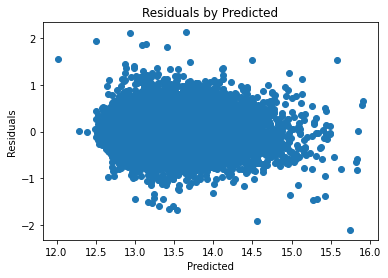

<Figure size 432x288 with 0 Axes>

In [314]:
hold_out["residuals"] = model_results1.resid
hold_out["predicted"] = model_results1.fittedvalues
plt.scatter(hold_out.predicted, hold_out.residuals)
plt.title("Residuals by Predicted")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.figure()

In [315]:
hold_out["CooksD"] = model_results1.get_influence().summary_frame().filter(["cooks_d"])

In [316]:
hold_out = hold_out[(hold_out.CooksD < (4/hold_out.residuals.count()))]

In [317]:
from patsy import dmatrices
import statsmodels.api as sm_non_formula

In [318]:
y,X = dmatrices('SalePrice_Log ~ ZipCode + Stories + SqFt1stFloor + SqFt2ndFloor + SqFtUpperFloor + SqFtFinBasement + SqFtTotBasement:HasBasement + FinBasementGrade + SqFtGarageBasement:HasGarageBasement + SqFtGarageAttached:HasGarage + SqFtOpenPorch + SqFtEnclosedPorch + SqFtDeck + BrickStone + Bedrooms + BathHalfCount + Bath3qtrCount + BathFullCount + FpSingleStory:HasFpSingleStory + FpFreestanding + FpAdditional + Condition + AddnlCost + TransactionYear + SqFtTotLiving_Log + BldgGrade_square + Age_square', data=hold_out, return_type='dataframe')

In [319]:
robust_results2 = sm_non_formula.RLM(y, X, M=sm_non_formula.robust.norms.HuberT()).fit()

In [320]:
robust_results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:          SalePrice_Log   No. Observations:                20558
Model:                            RLM   Df Residuals:                    20530
Method:                          IRLS   Df Model:                           27
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Tue, 28 Sep 2021                                         
Time:                        21:48:30                                         
No. Iterations:                    34                                         
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                              -71.6926      9.193     -7.799      0.000     -89.710     -53.675
ZipCode                                  0.0005   4.24e-05     11.371      0.000       0.000       0.001
Stories                                  0.0734      0.011      6.716      0.000       0.052       0.095
SqFt1stFloor                          6.425e-05   1.14e-05      5.613      0.000    4.18e-05    8.67e-05
SqFt2ndFloor                           5.48e-05   9.12e-06      6.012      0.000    3.69e-05    7.27e-05
SqFtUpperFloor                           0.0002   4.55e-05      3.812      0.000    8.42e-05       0.000
SqFtFinBasement                      -8.292e-05   1.39e-05     -5.960      0.000      -0.000   -5.57e-05
SqFtTotBasement:HasBasement              0.0001   9.39e-06     15.215      0.000       0.000       0.000
FinBasementGrade                         0.0096      0.001      7.140      0.000       0.007       0.012
SqFtGarageBasement:HasGarageBasement    -0.0002   1.71e-05    -12.372      0.000      -0.000      -0.000
SqFtGarageAttached:HasGarage            -0.0002   1.15e-05    -14.731      0.000      -0.000      -0.000
SqFtOpenPorch                            0.0001   2.21e-05      4.702      0.000    6.06e-05       0.000
SqFtEnclosedPorch                       -0.0002   6.04e-05     -2.581      0.010      -0.000   -3.75e-05
SqFtDeck                              9.711e-05   1.11e-05      8.767      0.000    7.54e-05       0.000
BrickStone                               0.0005      0.000      4.140      0.000       0.000       0.001
Bedrooms                                -0.0374      0.003    -11.941      0.000      -0.044      -0.031
BathHalfCount                            0.0233      0.005      4.522      0.000       0.013       0.033
Bath3qtrCount                            0.0671      0.005     13.919      0.000       0.058       0.077
BathFullCount                            0.0570      0.005     10.806      0.000       0.047       0.067
FpSingleStory:HasFpSingleStory           0.0199      0.004      4.843      0.000       0.012       0.028
FpFreestanding                          -0.0299      0.008     -3.837      0.000      -0.045      -0.015
FpAdditional                             0.0169      0.006      2.648      0.008       0.004       0.029
Condition                                0.0225      0.003      7.250      0.000       0.016       0.029
AddnlCost                            -3.375e-06   9.38e-07     -3.599      0.000   -5.21e-06   -1.54e-06
TransactionYear                          0.0173      0.004      4.301      0.000       0.009       0.025
SqFtTotLiving_Log                        0.2028      0.018     11.231      0.000       0.167       0.238
BldgGrade_square                      

In [321]:
robust_results3 = model_results1.get_robustcov_results(cov_type='HC3', use_t=None)
robust_results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          SalePrice_Log   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     1016.
Date:                Tue, 28 Sep 2021   Prob (F-statistic):               0.00
Time:                        21:48:32   Log-Likelihood:                -6007.2
No. Observations:               21692   AIC:                         1.207e+04
Df Residuals:                   21664   BIC:                         1.229e+04
Df Model:                          27                                         
Covariance Type:                  HC3                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                              -33.1071     23.298     -1.421      0.155     -78.773      12.559
ZipCode                                  0.0001      0.000      0.600      0.548      -0.000       0.001
Stories                                  0.0605      0.012      5.031      0.000       0.037       0.084
SqFt1stFloor                          5.698e-05   1.35e-05      4.213      0.000    3.05e-05    8.35e-05
SqFt2ndFloor                           4.72e-05   1.11e-05      4.243      0.000    2.54e-05     6.9e-05
SqFtUpperFloor                           0.0002   3.99e-05      4.911      0.000       0.000       0.000
SqFtFinBasement                      -7.473e-05   1.67e-05     -4.462      0.000      -0.000   -4.19e-05
SqFtTotBasement:HasBasement              0.0001   1.16e-05      9.964      0.000    9.31e-05       0.000
FinBasementGrade                         0.0098      0.001      6.654      0.000       0.007       0.013
SqFtGarageBasement:HasGarageBasement    -0.0002   1.95e-05    -11.032      0.000      -0.000      -0.000
SqFtGarageAttached:HasGarage            -0.0002   1.56e-05    -10.594      0.000      -0.000      -0.000
SqFtOpenPorch                            0.0001   2.56e-05      5.848      0.000    9.94e-05       0.000
SqFtEnclosedPorch                    -9.188e-05      6e-05     -1.530      0.126      -0.000    2.58e-05
SqFtDeck                              8.547e-05   1.23e-05      6.955      0.000    6.14e-05       0.000
BrickStone                               0.0006      0.000      4.126      0.000       0.000       0.001
Bedrooms                                -0.0382      0.004    -10.611      0.000      -0.045      -0.031
BathHalfCount                            0.0180      0.006      3.075      0.002       0.007       0.029
Bath3qtrCount                            0.0735      0.006     13.099      0.000       0.063       0.085
BathFullCount                            0.0658      0.006     10.744      0.000       0.054       0.078
FpSingleStory:HasFpSingleStory           0.0209      0.005      4.618      0.000       0.012       0.030
FpFreestanding                          -0.0341      0.008     -4.042      0.000      -0.051      -0.018
FpAdditional                             0.0288      0.007      3.974      0.000       0.015       0.043
Condition                                0.0186      0.004      4.649      0.000       0.011       0.026
AddnlCost                            -3.442e-06   1.12e-06     -3.064      0.002   -5.64e-06   -1.24e-06
TransactionYear                          0.0154      0.004      3.532      0.000       0.007       0.024
SqFtTotLiving_Log                        0.2311      0.022     10.401      0.000       0.188       0.275
BldgGrade_square                      